# Initialization

In [2]:
import pandas as pd
from safedigital import mechanical
import os
import numpy as np
import matplotlib.pyplot as plt

# Travel in degree comparison

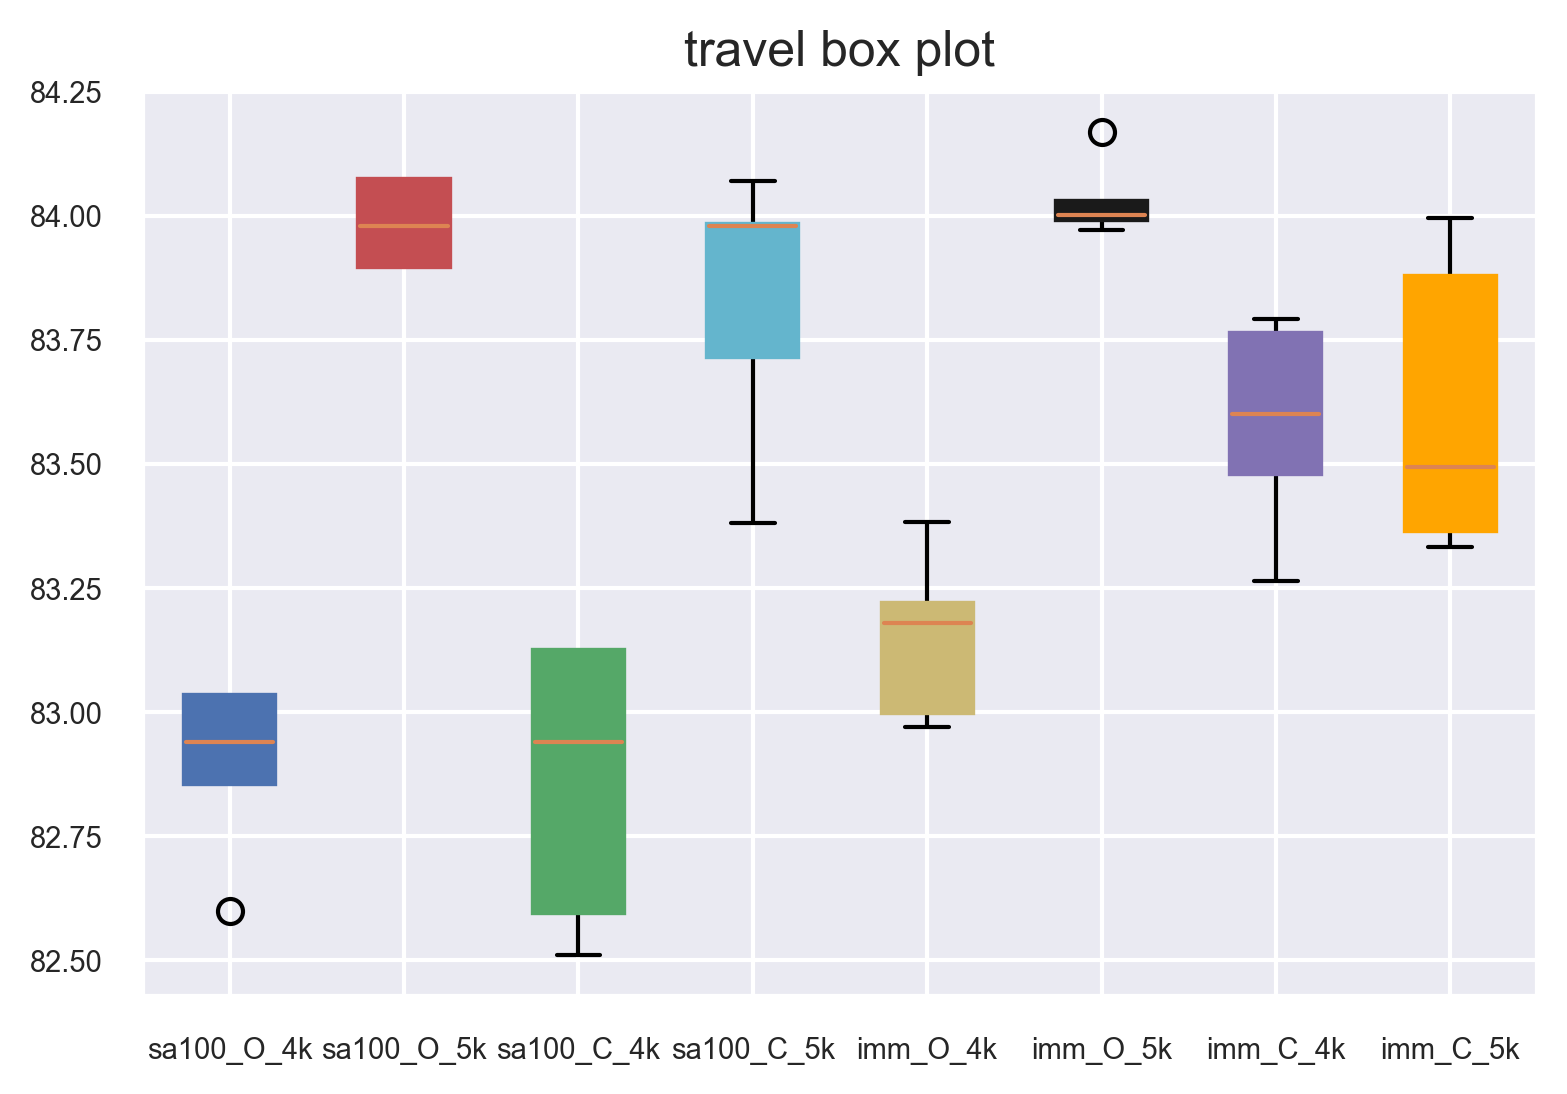

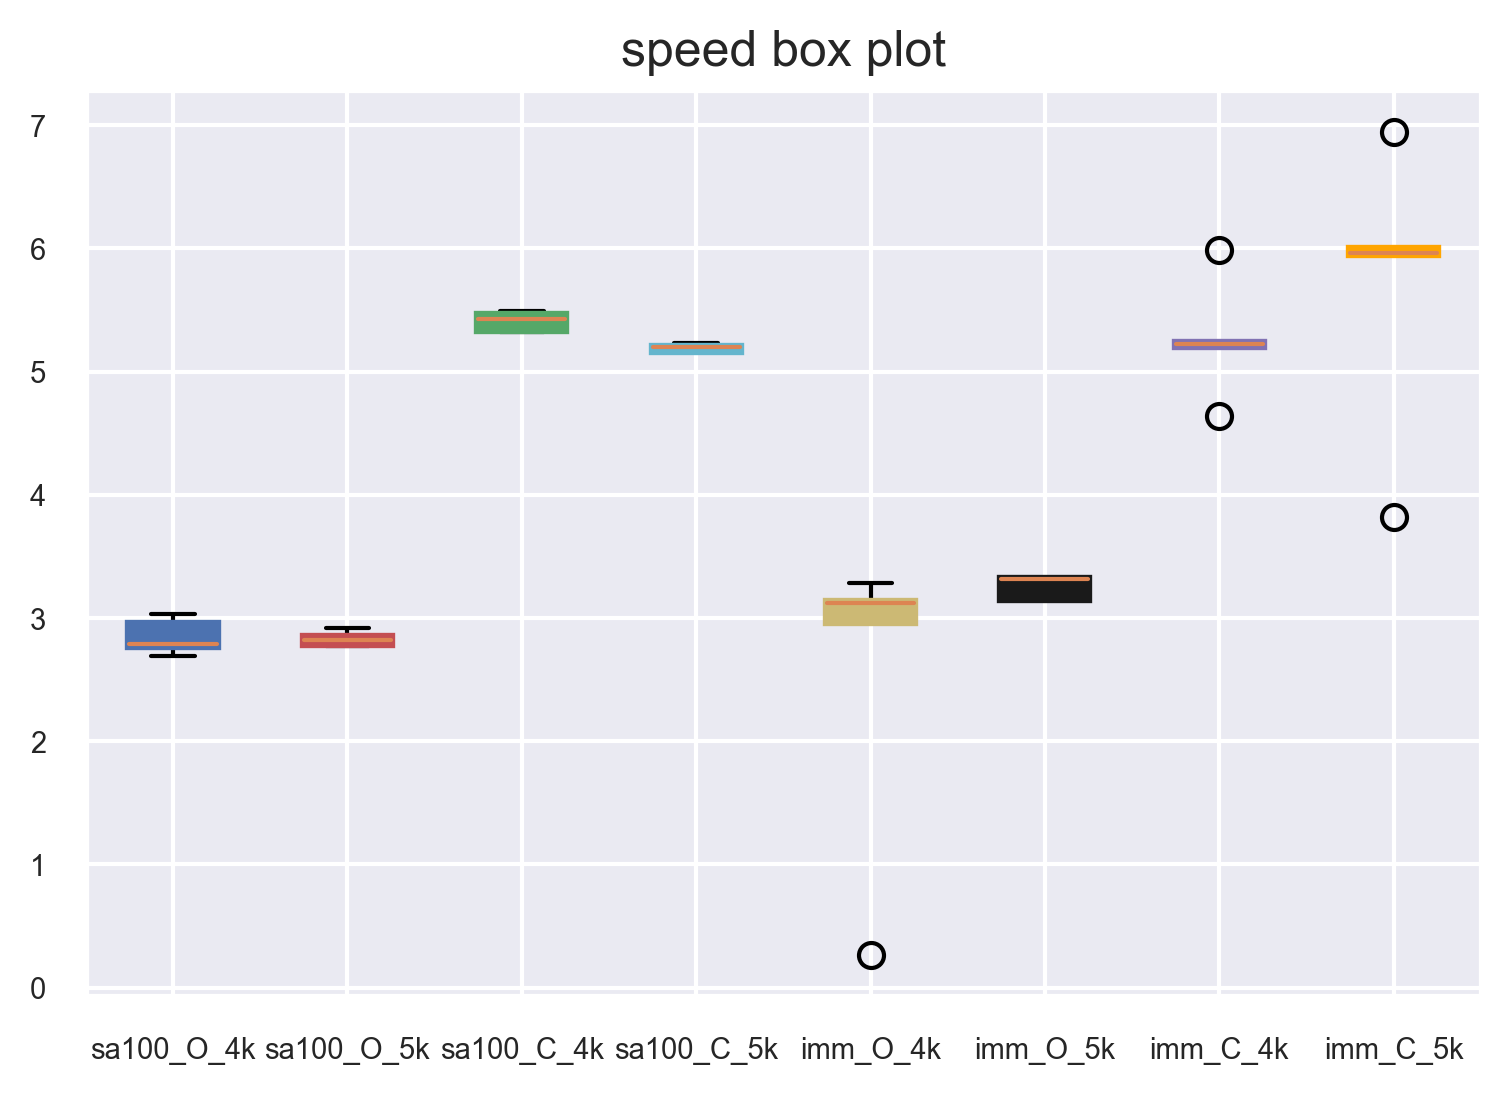

In [16]:
imm_data_folder = r'C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\2022xxxx_ME_test\2022_06_14_SA100_VS_IMM'
# load data from SA100
result_dict = {'sa100_open_deg':[83.03,83.03,82.86,82.94,82.60,83.90,83.90,83.98,84.07,84.07], 
			   'sa100_open_spd':[3.03,2.95,2.79,2.77,2.69,2.92,2.85,2.79,2.82,2.77],
			   'sa100_close_deg':[83.12,83.12,82.94,82.51,82.60,83.38,83.72,84.07,83.98,83.98],
			   'sa100_close_spd':[5.34,5.32,5.46,5.49,5.43,5.20,5.23,5.20,5.17,5.17],
			   'imm_open_deg':[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
			   'imm_open_spd':[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
			   'imm_close_deg':[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
			   'imm_close_spd':[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

result_df = pd.DataFrame(result_dict,index=['4000_1','4000_2','4000_3','4000_4','4000_5',
											'5000_1','5000_2','5000_3','5000_4','5000_5'])

file_list = os.listdir(imm_data_folder)
open_angle_file_list,close_angle_file_list = [],[]

# find open angle data and close angle data separately 
for file in file_list:
	if ('ang' in file) and ('open' in file) :
		open_angle_file_list.append(file)
	elif ('ang' in file) and ('close' in file): 
		close_angle_file_list.append(file)

# calculate travel and speed from open angle data
for num, file in enumerate(open_angle_file_list):
	case_open = mechanical.MechOper(imm_data_folder + '\\' + file)
	ang_data = np.array(case_open.data.iloc[:,0])
	head,tail = mechanical.MechOper.find_head_tail(ang_data)
	travel,angle_open,angle_close  = case_open.travel(head,tail)
	speed = case_open.avg_speed(ang_data/100, 
								'O', 
								travel, 
								angle_close)
	# print('file_name',file)
	# print('speed','{:.2f}'.format(speed))
	# print('travel','{:.2f}'.format(travel))
	result_df.iloc[num,4] = travel
	result_df.iloc[num,5] = speed

# calculate travel and speed from close angle data
for num, file in enumerate(close_angle_file_list):
	case_close = mechanical.MechOper(imm_data_folder + '\\' + file)
	ang_data = np.array(case_close.data.iloc[:, 0])
	head,tail = mechanical.MechOper.find_head_tail(ang_data)
	travel,angle_open,angle_close  = case_close.travel(head,tail)
	# print('travel,angle_open,angle_close',travel, angle_open, angle_close)
	speed = case_open.avg_speed(ang_data/100, 
								'C', 
								travel, 
								angle_close)
	# print('file_name',file)
	# print('speed','{:.2f}'.format(speed))
	# print('travel','{:.2f}'.format(travel))
	result_df.iloc[num, 6] = travel
	result_df.iloc[num, 7] = speed

label_list = ['sa100_O_4k', 
			  'sa100_O_5k', 
			  'sa100_C_4k', 
			  'sa100_C_5k', 
			  'imm_O_4k', 
			  'imm_O_5k', 
			  'imm_C_4k', 
			  'imm_C_5k'] 

box_color_list = ['b','r','g','c','y','k','m','orange']



# re-structure the result dataframe into narray
result_4k_narray = np.array(result_df.iloc[0:5, :])
result_5k_narray = np.array(result_df.iloc[5:, :])
result_narray = np.concatenate((result_4k_narray, result_5k_narray), axis=1)


# Box plot
plt.figure(dpi=300)
plt.title('travel box plot')
mechanical.MechOper.box_plot(label_list, 
							 result_narray[:,[0,8,2,10,4,12,6,14]], 
							 box_color_list)

plt.figure(dpi=300)
plt.title('speed box plot')
mechanical.MechOper.box_plot(label_list, 
							 result_narray[:,[1,9,3,11,5,13,7,15]], 
							 box_color_list)

 


# Open travel and error

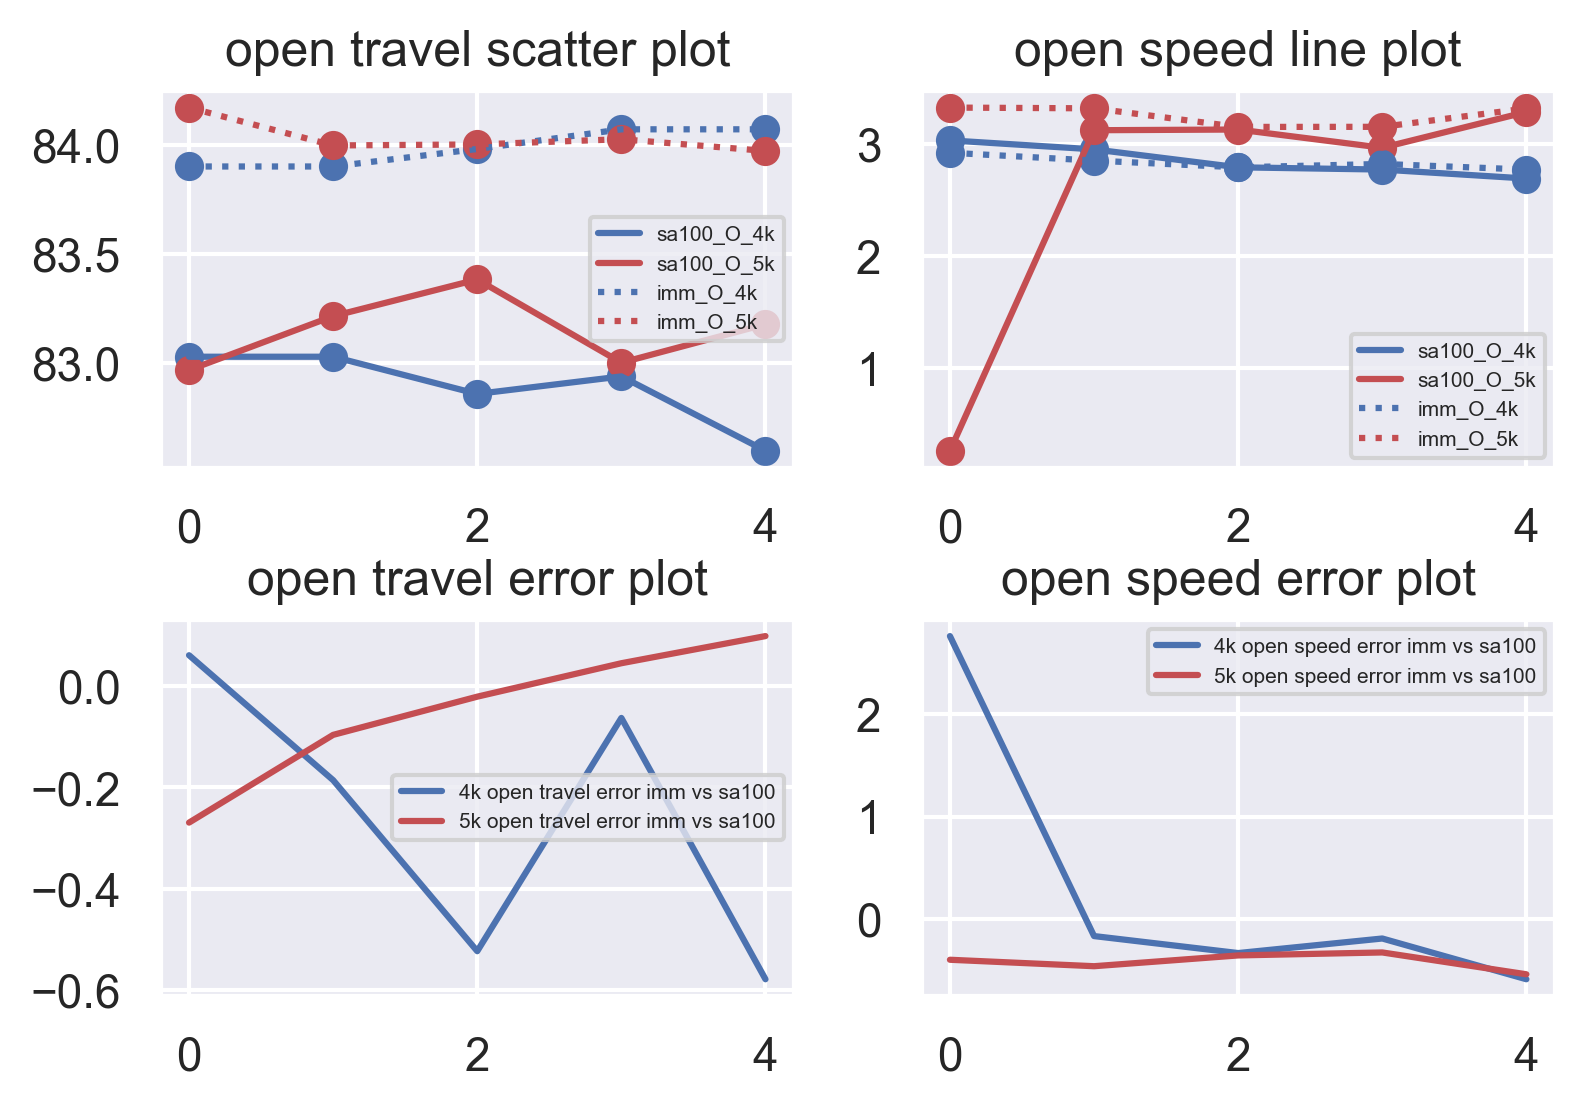

In [17]:
# line plot for open travel and error
line_list = ['-','-',':',':']
line_color_list = ['b','r','b','r']
line_label_list = ['sa100_O_4k','sa100_O_5k','imm_O_4k','imm_O_5k']
plt.figure(dpi=300)
plt.subplot(2,2,1)
plt.title('open travel scatter plot')
for num, ele in enumerate([0,4,8,12]):
	plt.plot(result_narray[:,ele],
			label=line_label_list[num], 
			color=line_color_list[num],
			linestyle=line_list[num],
			)
	plt.scatter(range(len(result_narray)), 
				result_narray[:,ele],
				color=line_color_list[num]
				)
plt.legend(fontsize=5)

plt.subplot(2,2,3)
plt.title('open travel error plot')
plt.plot(result_narray[:,0] - 
		 result_narray[:,4], 
		 label='4k open travel error imm vs sa100',
		 color='b')
plt.plot(result_narray[:,8] - 
		 result_narray[:,12], 
		 label='5k open travel error imm vs sa100',
		 color='r')
plt.legend(fontsize=5)
# plt.subplots_adjust(hspace=0.4)

# open line plot for speed
plt.subplot(2,2,2)
plt.title('open speed line plot')
for num, ele in enumerate([1,5,9,13]):
	plt.plot(result_narray[:,ele],
			label=line_label_list[num], 
			color=line_color_list[num],
			linestyle=line_list[num],
			)
	plt.scatter(range(len(result_narray)), 
				result_narray[:,ele],
				color=line_color_list[num]
				)
plt.legend(fontsize=5)

plt.subplot(2,2,4)
plt.title('open speed error plot')
plt.plot(result_narray[:,1] - 
		 result_narray[:,5], 
		 label='4k open speed error imm vs sa100',
		 color='b')
plt.plot(result_narray[:,9] - 
		 result_narray[:,13], 
		 label='5k open speed error imm vs sa100',
		 color='r')
plt.legend(fontsize=5)
plt.subplots_adjust(hspace=0.4)

# Close travel and error

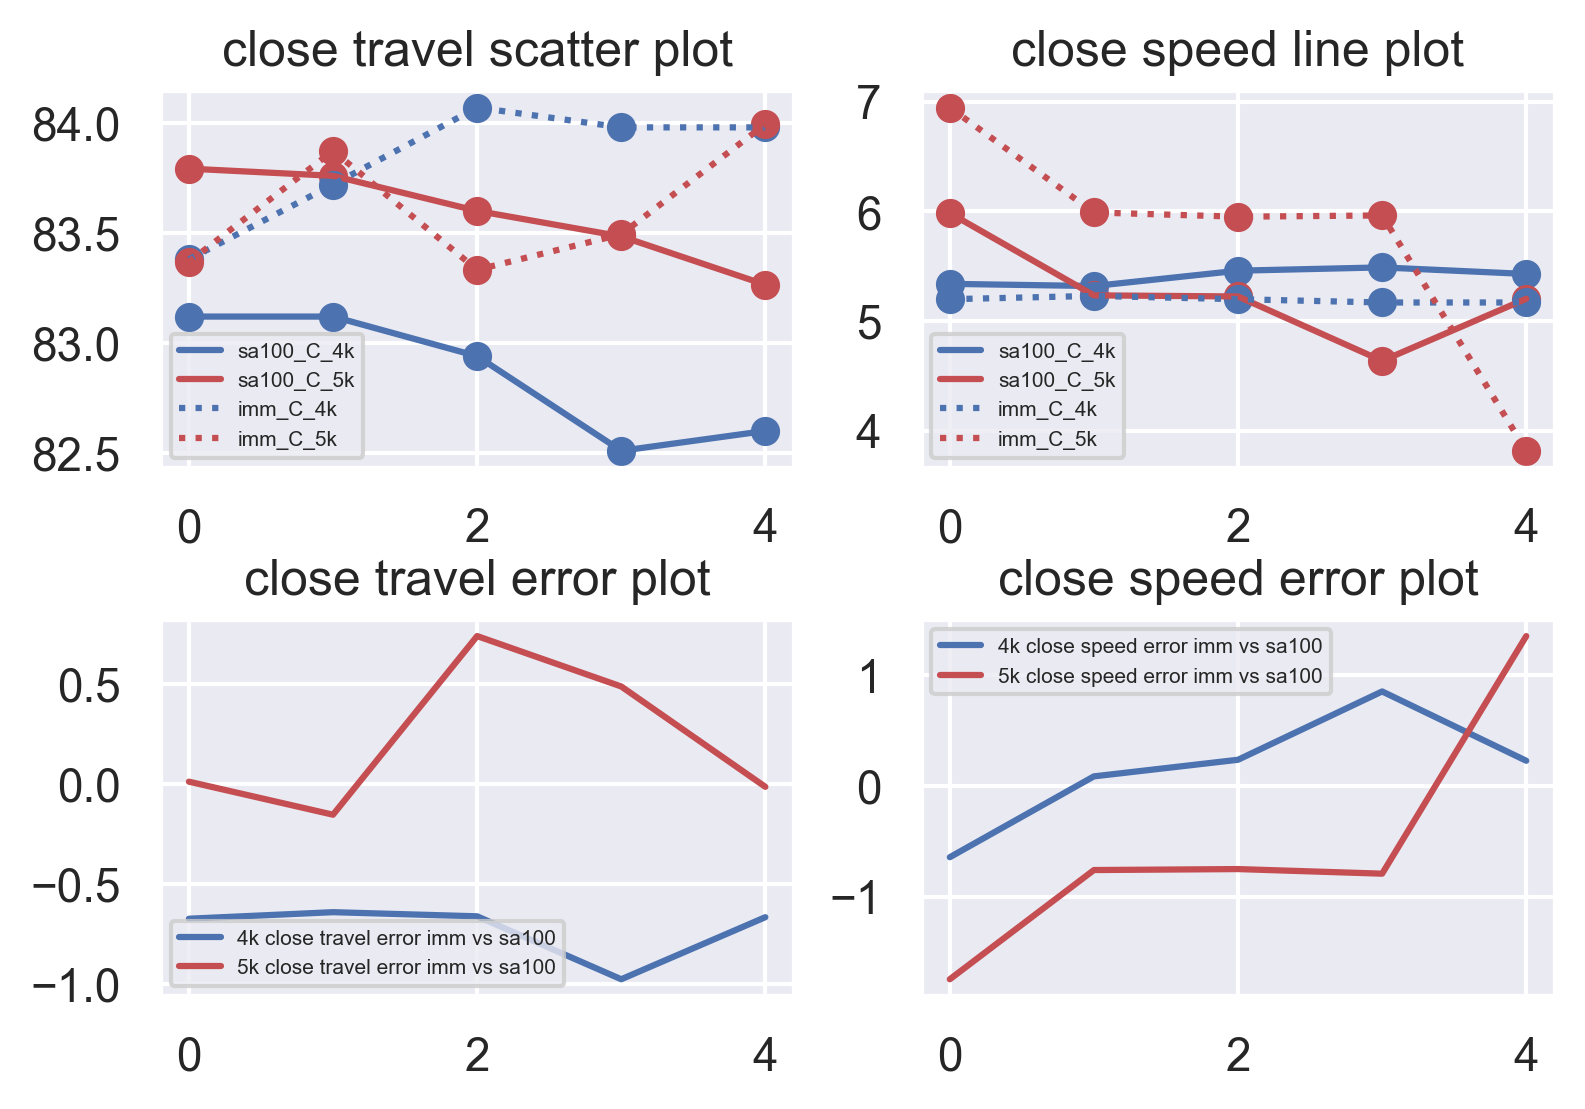

In [18]:
# line plot for close travel and error
line_list = ['-','-',':',':']
line_color_list = ['b','r','b','r']
line_label_list = ['sa100_C_4k','sa100_C_5k','imm_C_4k','imm_C_5k']
plt.figure(dpi=300)
plt.subplot(2,2,1)
plt.title('close travel scatter plot')
for num, ele in enumerate([2,6,10,14]):
	plt.plot(result_narray[:,ele],
			label=line_label_list[num], 
			color=line_color_list[num],
			linestyle=line_list[num],
			)
	plt.scatter(range(len(result_narray)), 
				result_narray[:,ele],
				color=line_color_list[num]
				)
plt.legend(fontsize=5)

plt.subplot(2,2,3)
plt.title('close travel error plot')
plt.plot(result_narray[:,2] - 
		 result_narray[:,6], 
		 label='4k close travel error imm vs sa100',
		 color='b')
plt.plot(result_narray[:,10] - 
		 result_narray[:,14], 
		 label='5k close travel error imm vs sa100',
		 color='r')
plt.legend(fontsize=5)
# plt.subplots_adjust(hspace=0.4)

# open line plot for speed
plt.subplot(2,2,2)
plt.title('close speed line plot')
for num, ele in enumerate([3,7,11,15]):
	plt.plot(result_narray[:,ele],
			label=line_label_list[num], 
			color=line_color_list[num],
			linestyle=line_list[num],
			)
	plt.scatter(range(len(result_narray)), 
				result_narray[:,ele],
				color=line_color_list[num]
				)
plt.legend(fontsize=5)

plt.subplot(2,2,4)
plt.title('close speed error plot')
plt.plot(result_narray[:,3] - 
		 result_narray[:,7], 
		 label='4k close speed error imm vs sa100',
		 color='b')
plt.plot(result_narray[:,11] - 
		 result_narray[:,15], 
		 label='5k close speed error imm vs sa100',
		 color='r')
plt.legend(fontsize=5)
plt.subplots_adjust(hspace=0.4)

# plot travel curves

## define function plot travel curves

In [24]:
def plot_travel_curve(folder, folder_fig, **kwargs):
	curve_num = kwargs.get('curve_num', 2)
	file_list = os.listdir(folder)
	# print(file_list)
	open_file_list,close_file_list = [],[]

	# find open angle data and close angle data separately 
	for file in file_list:
		if ('ang' in file) and ('open' in file) :
			open_file_list.append(file)
		elif ('ang' in file) and ('close' in file): 
			close_file_list.append(file)
	for num, file in enumerate(open_file_list[:curve_num]):
		case_open = mechanical.MechOper(folder + '\\' + file)
		print(file)
		plt.figure()
		plt.plot(case_open.data.values)
		plt.savefig(folder_fig  + '\\Figures\\{}th_open_curve.png'.format(num))

	for num, file in enumerate(close_file_list[:curve_num]):
		case_close = mechanical.MechOper(folder + '\\' + file)
		print(file)
		plt.figure()
		plt.plot(case_close.data.values)
		plt.savefig(folder_fig  + '\\Figures\\{}th_close_curve.png'.format(num))

## 20220520

2022-05-19-10-21-28_ang_open.csv
2022-05-19-10-21-34_ang_open.csv
2022-05-19-10-22-10_ang_open.csv
2022-05-19-10-22-16_ang_open.csv
2022-05-19-10-22-52_ang_open.csv
2022-05-19-10-22-57_ang_open.csv
2022-05-19-10-23-23_ang_open.csv
2022-05-19-10-23-35_ang_open.csv
2022-05-19-10-23-39_ang_open.csv
2022-05-19-10-24-06_ang_open.csv
2022-05-19-10-21-49_ang_close.csv
2022-05-19-10-21-55_ang_close.csv
2022-05-19-10-22-32_ang_close.csv
2022-05-19-10-22-36_ang_close.csv
2022-05-19-10-23-02_ang_close.csv
2022-05-19-10-23-14_ang_close.csv
2022-05-19-10-23-18_ang_close.csv
2022-05-19-10-23-45_ang_close.csv
2022-05-19-10-23-56_ang_close.csv
2022-05-19-10-24-00_ang_close.csv


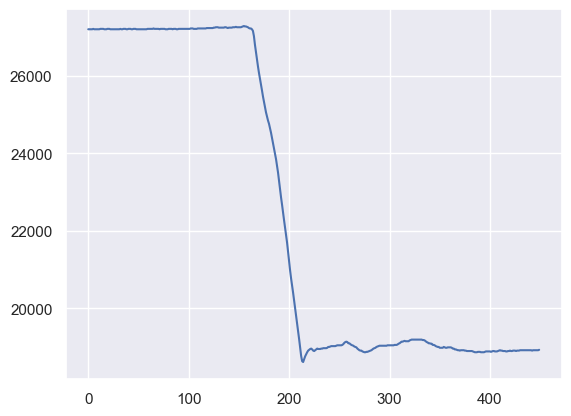

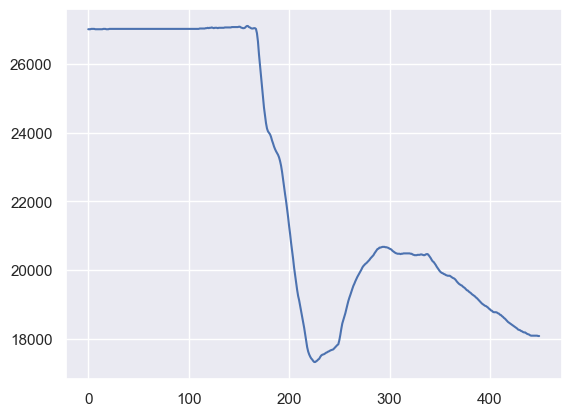

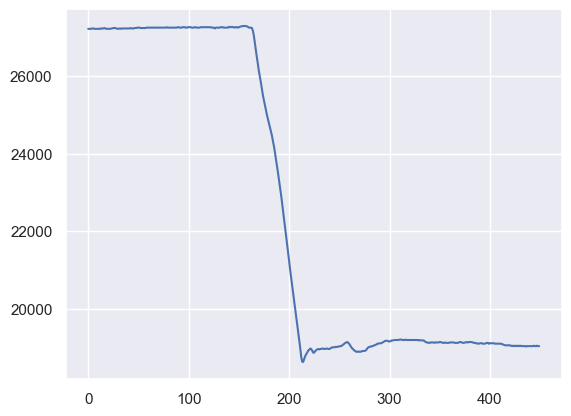

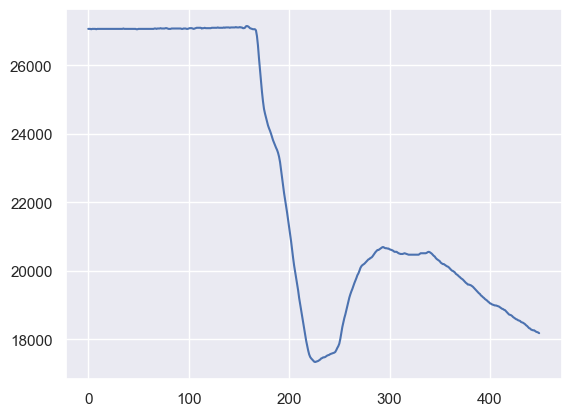

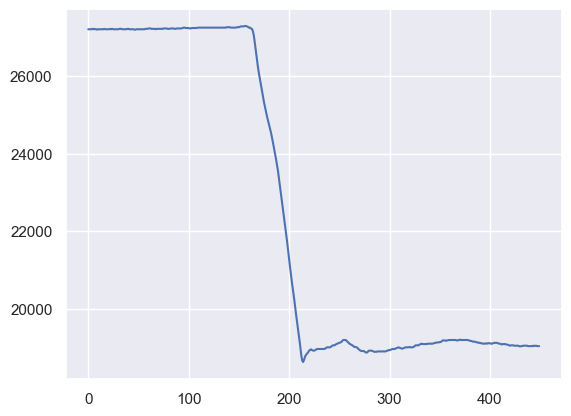

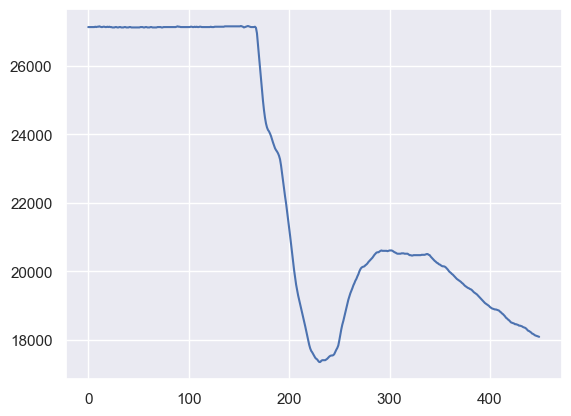

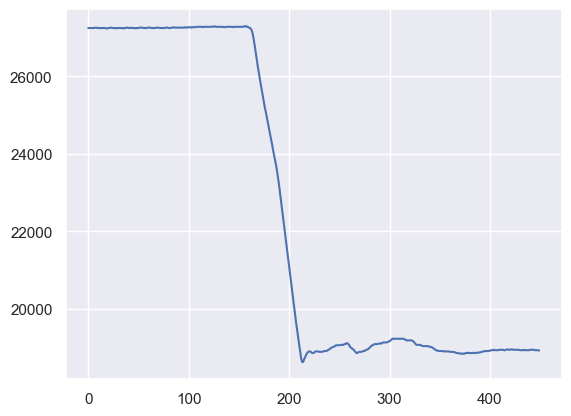

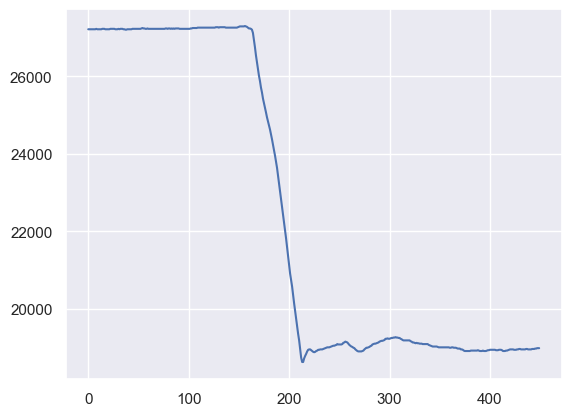

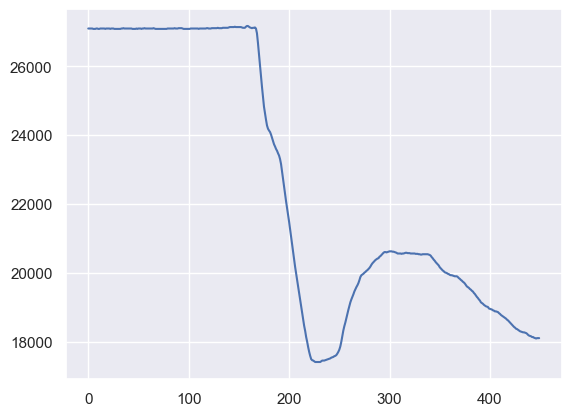

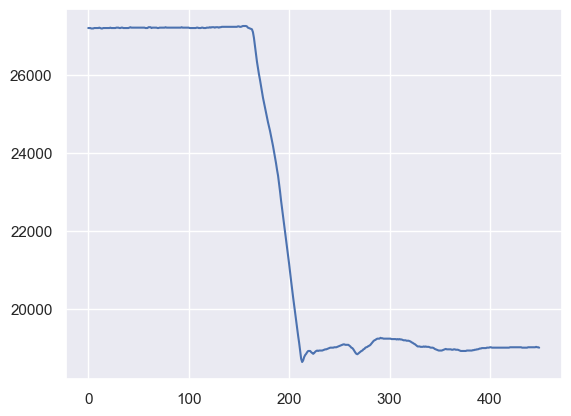

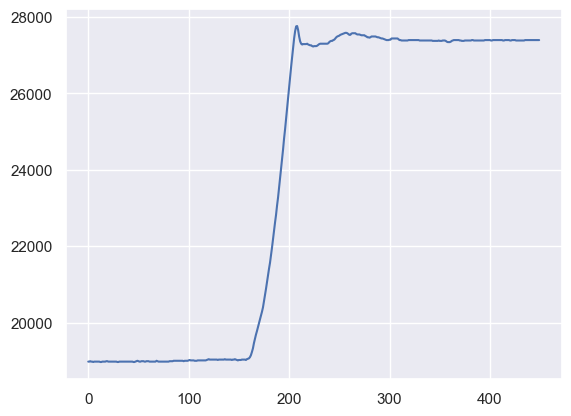

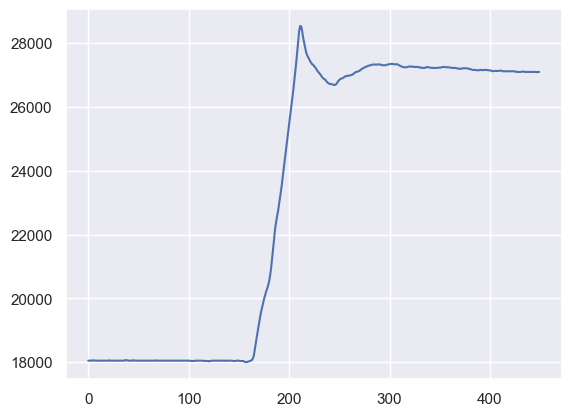

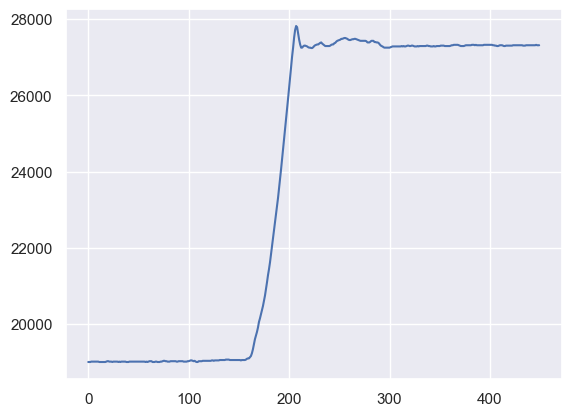

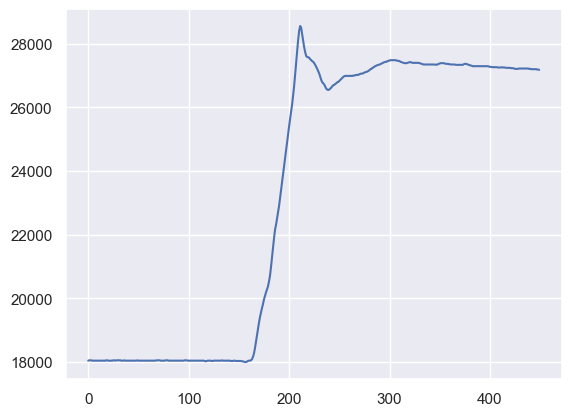

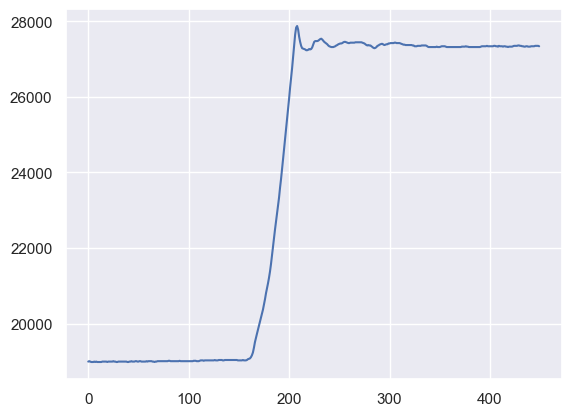

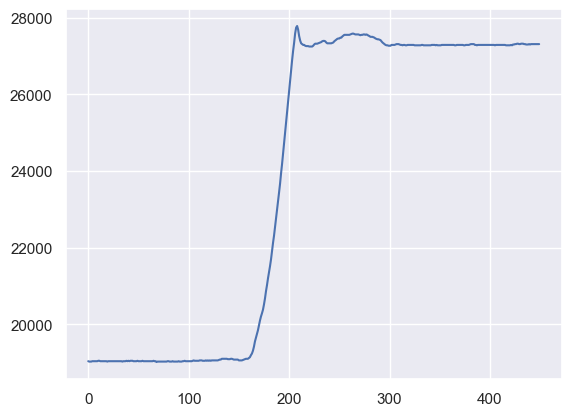

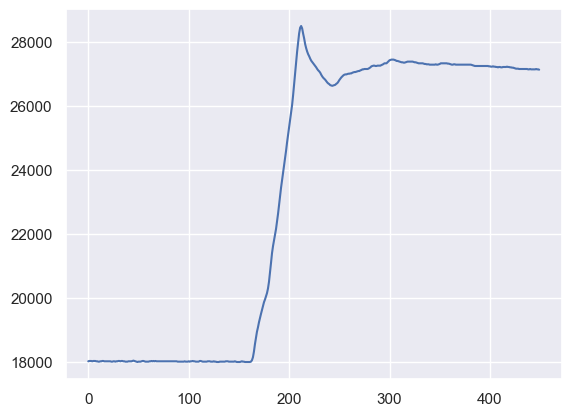

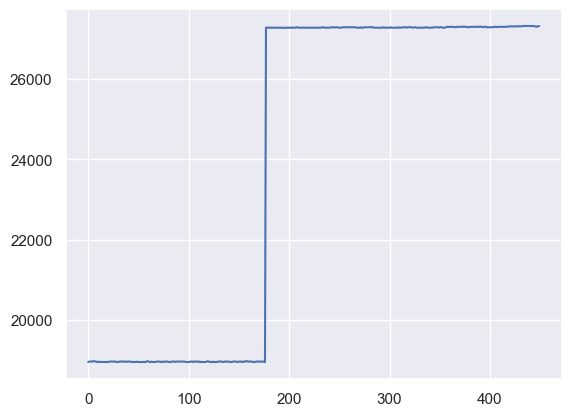

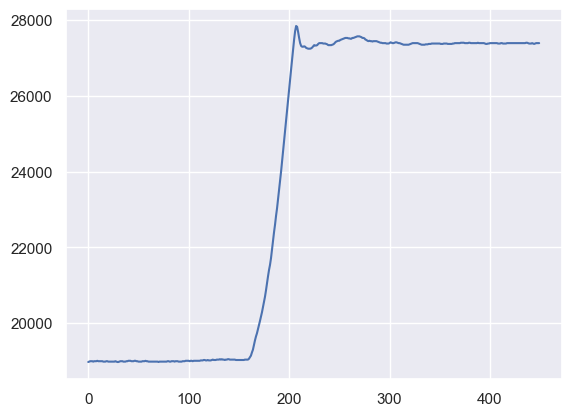

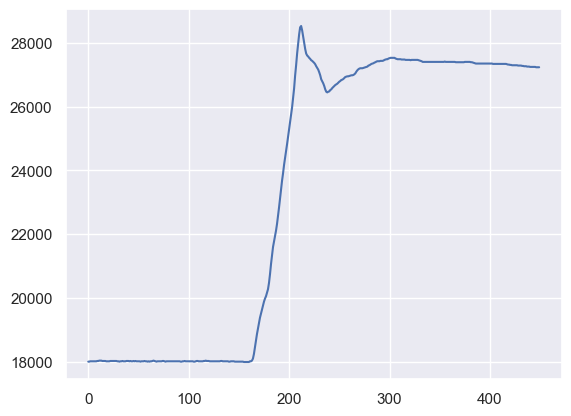

In [41]:
folder = r'C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20220520_ME_XXXX_XXX_Angle_Sensor_Verify_Test_0_5000\0_Data original\20220520\IMMLogger'
folder_fig = folder[:-10]
plot_travel_curve(folder, folder_fig, curve_num=10)

## 20220523

2022-05-23-09-31-34_ang_open.csv
2022-05-23-09-31-36_ang_open.csv
2022-05-23-09-31-38_ang_open.csv
2022-05-23-09-31-39_ang_open.csv
2022-05-23-09-31-40_ang_open.csv
2022-05-23-09-31-41_ang_open.csv
2022-05-23-09-31-44_ang_open.csv
2022-05-23-09-31-45_ang_open.csv
2022-05-23-09-31-47_ang_open.csv
2022-05-23-09-31-48_ang_open.csv
2022-05-23-09-31-34_ang_close.csv
2022-05-23-09-31-35_ang_close.csv
2022-05-23-09-31-36_ang_close.csv
2022-05-23-09-31-39_ang_close.csv
2022-05-23-09-31-42_ang_close.csv
2022-05-23-09-31-43_ang_close.csv
2022-05-23-09-31-44_ang_close.csv
2022-05-23-09-31-47_ang_close.csv
2022-05-23-09-31-48_ang_close.csv
2022-05-23-09-31-49_ang_close.csv


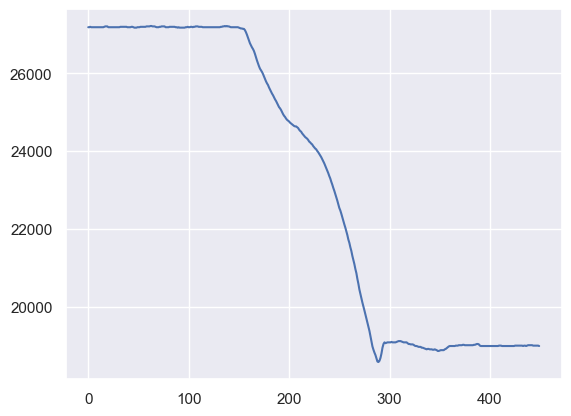

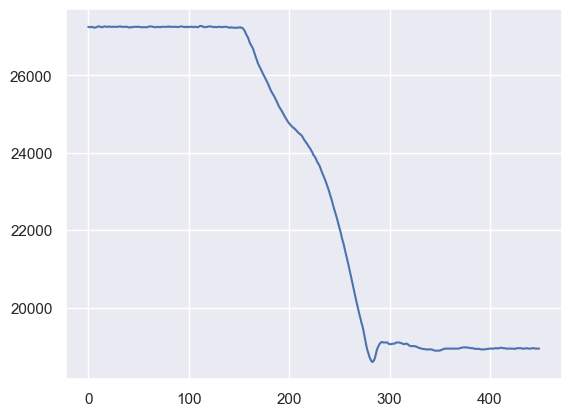

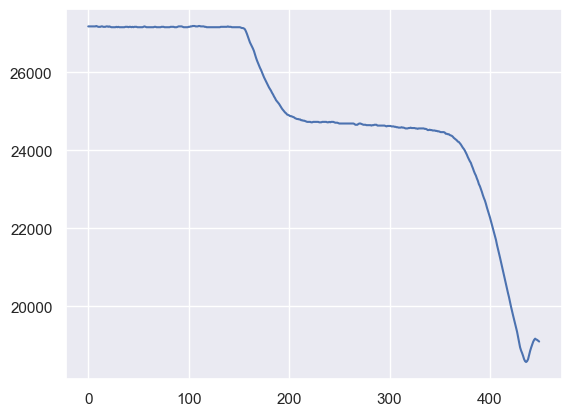

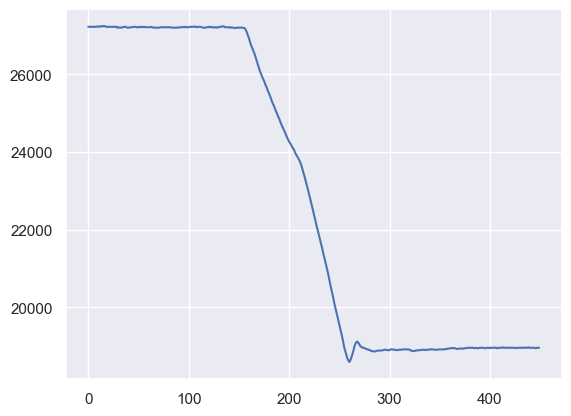

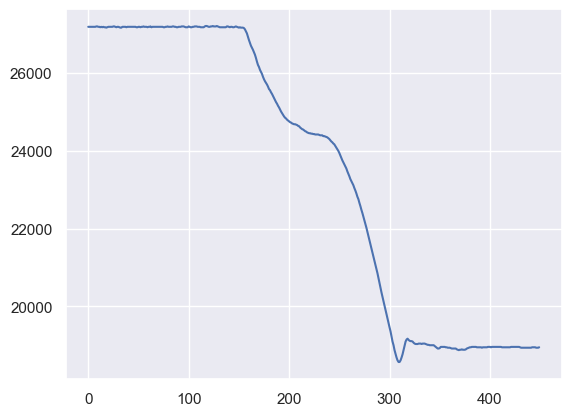

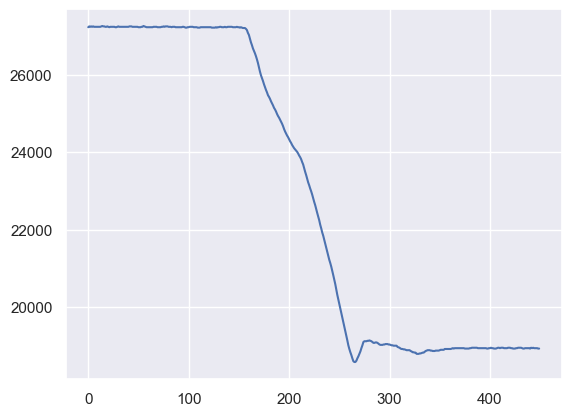

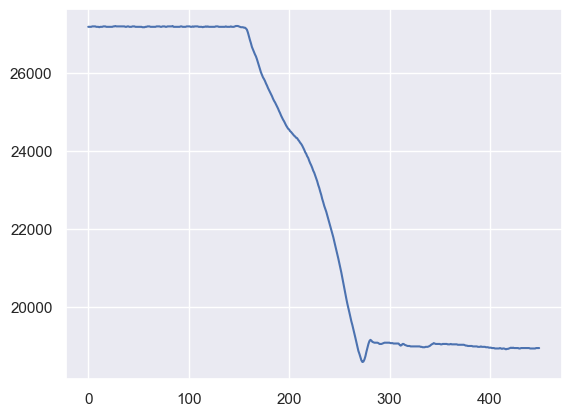

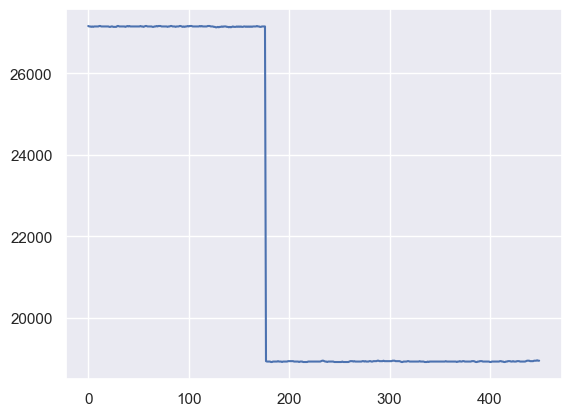

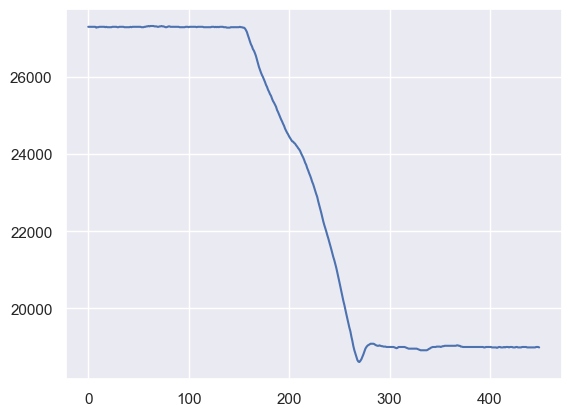

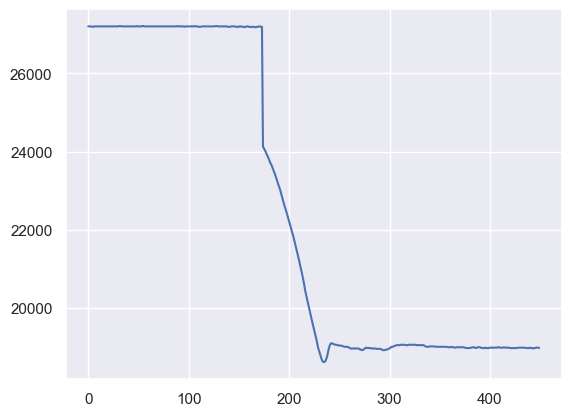

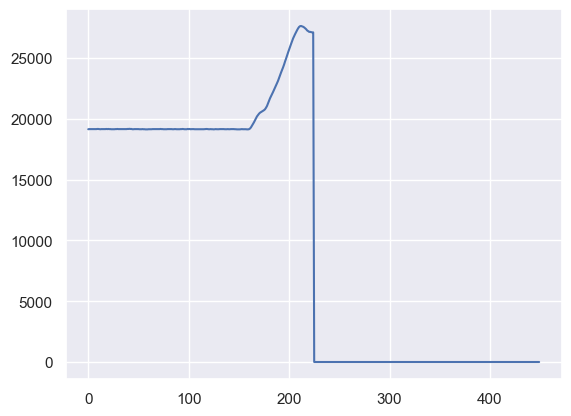

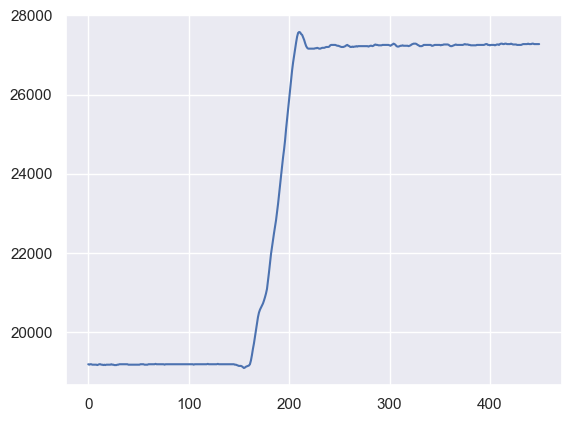

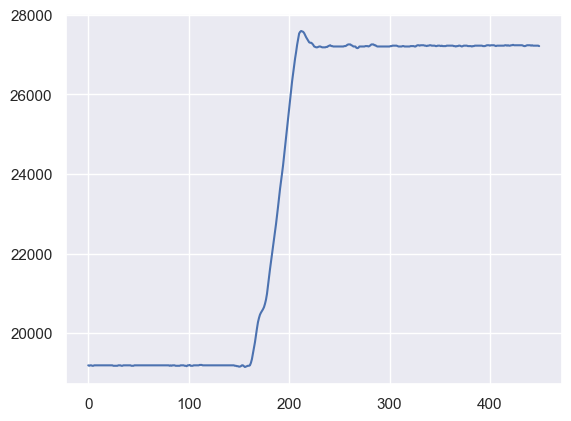

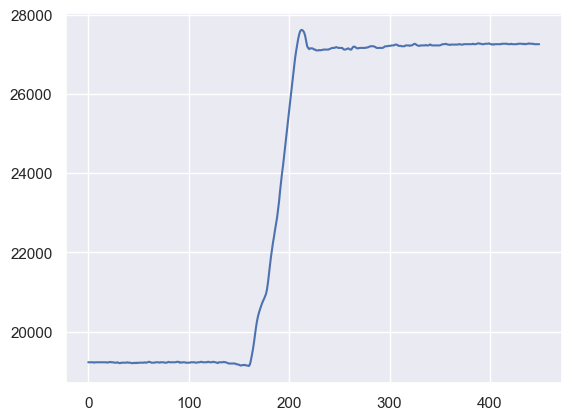

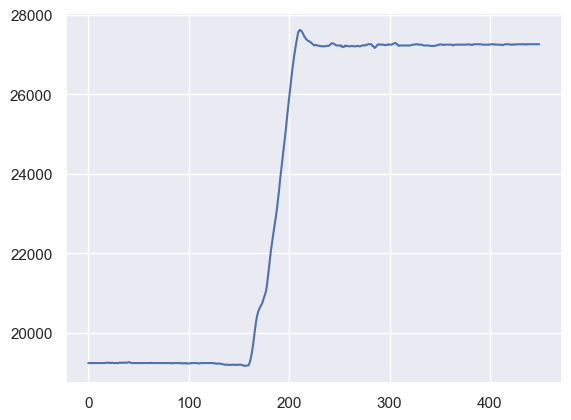

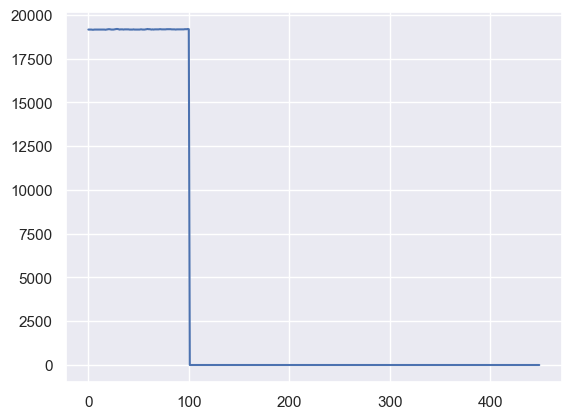

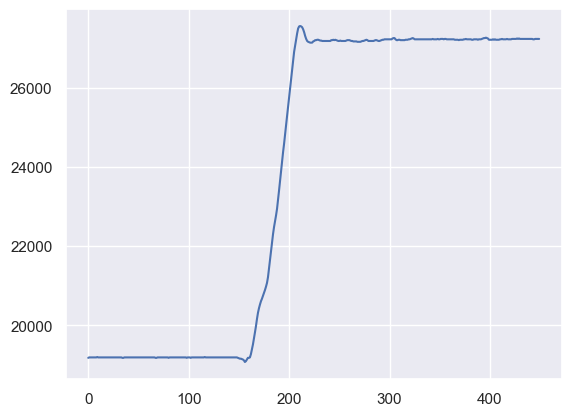

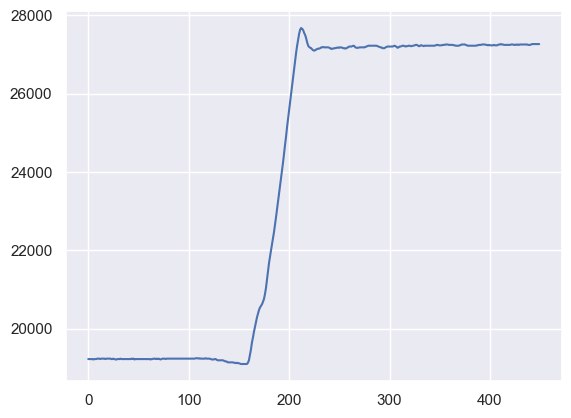

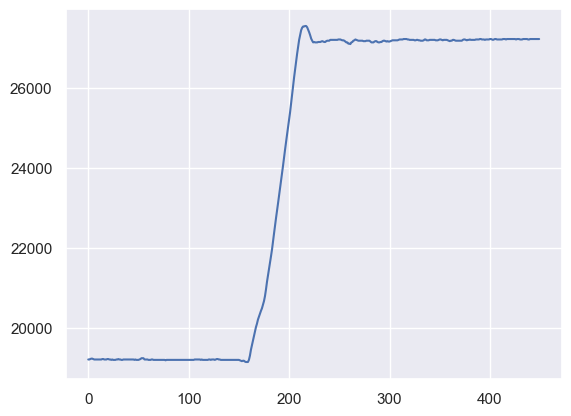

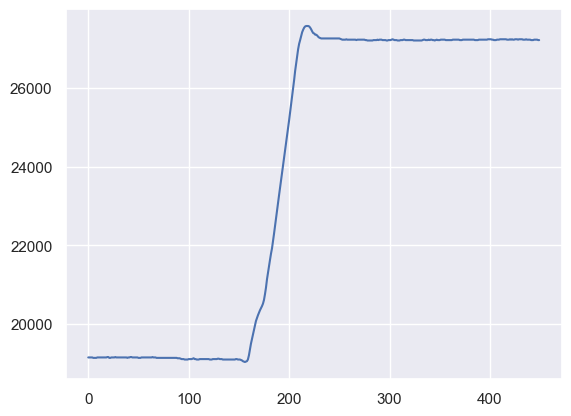

In [43]:
folder = 'C:\\Users\\cnbofan1\\ABB\\Safe Digital in CN - Documents - Documents\
\\06_Test and Analytics\\20220520_ME_XXXX_XXX_Angle_Sensor_Verify_Test_0_5000\\0_Data original\\20220523'
folder_fig = folder
plot_travel_curve(folder, folder_fig, curve_num=10)

## 20220530

2022-05-30-09-31-45_ang_open.csv
2022-05-30-09-31-47_ang_open.csv
2022-05-30-09-31-48_ang_open.csv
2022-05-30-09-31-49_ang_open.csv
2022-05-30-09-31-50_ang_open.csv
2022-05-30-09-31-51_ang_open.csv
2022-05-30-09-31-53_ang_open.csv
2022-05-30-09-31-55_ang_open.csv
2022-05-30-09-31-56_ang_open.csv
2022-05-30-09-31-58_ang_open.csv
2022-05-30-09-31-44_ang_close.csv
2022-05-30-09-31-45_ang_close.csv
2022-05-30-09-31-46_ang_close.csv
2022-05-30-09-31-47_ang_close.csv
2022-05-30-09-31-48_ang_close.csv
2022-05-30-09-31-50_ang_close.csv
2022-05-30-09-31-51_ang_close.csv
2022-05-30-09-31-52_ang_close.csv
2022-05-30-09-31-53_ang_close.csv
2022-05-30-09-31-56_ang_close.csv


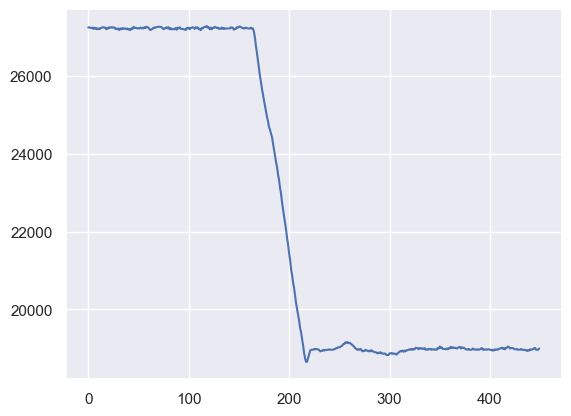

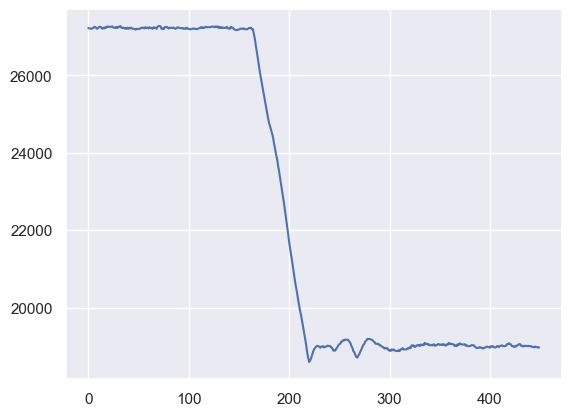

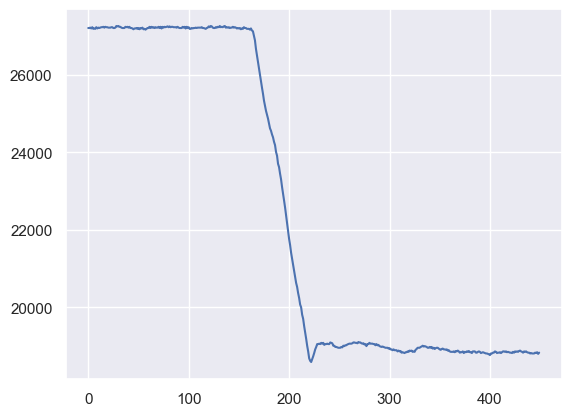

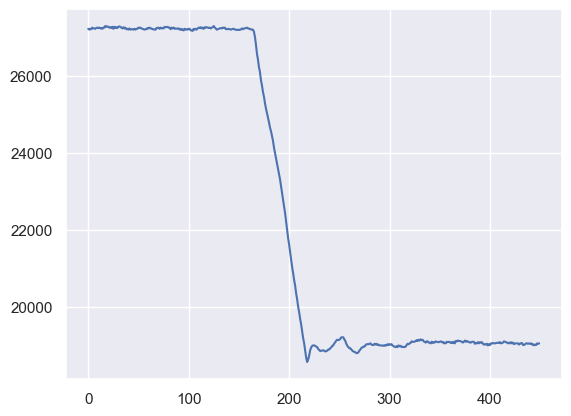

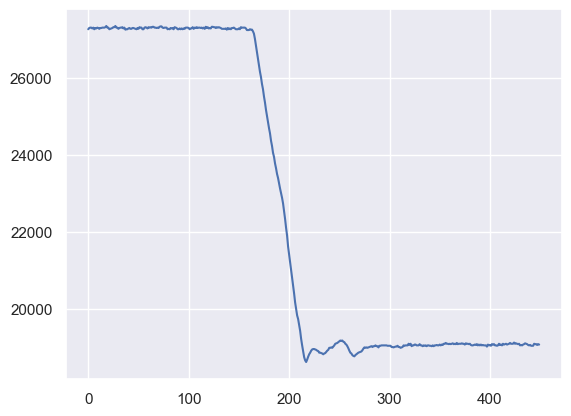

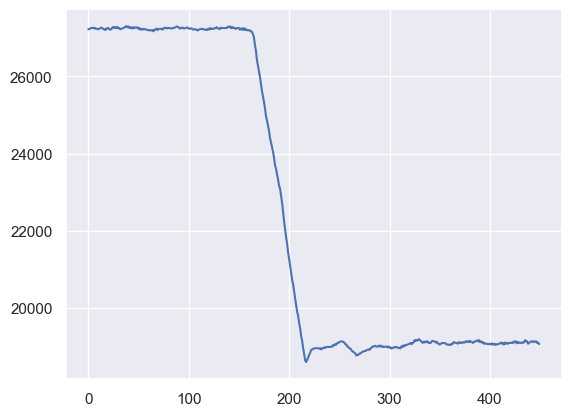

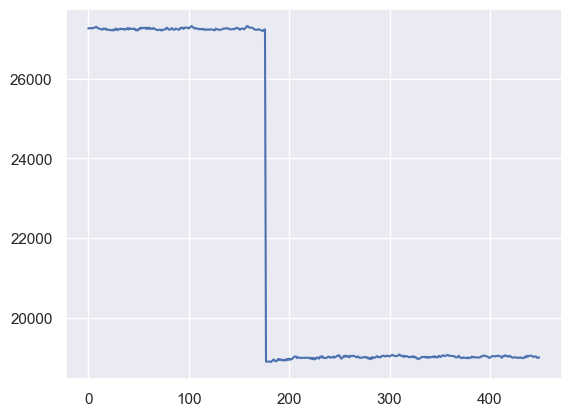

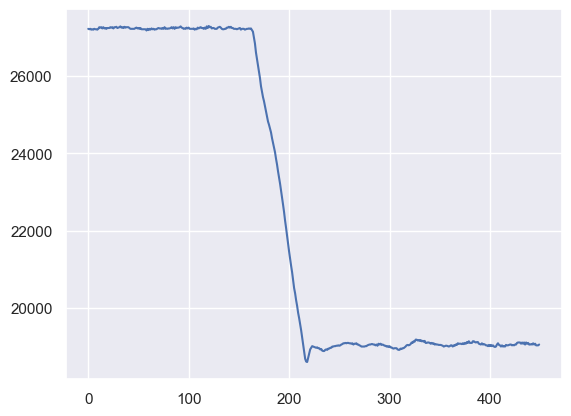

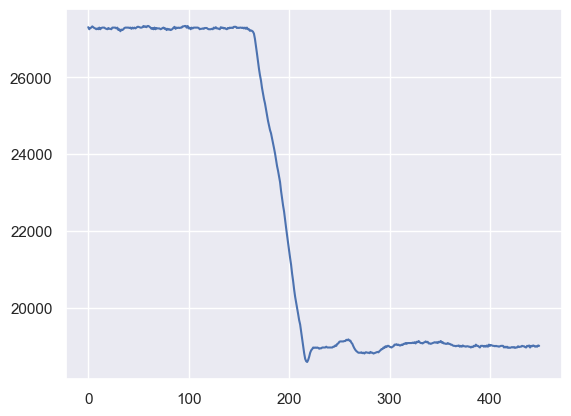

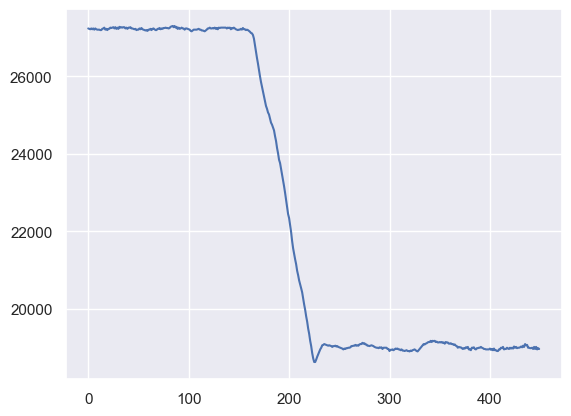

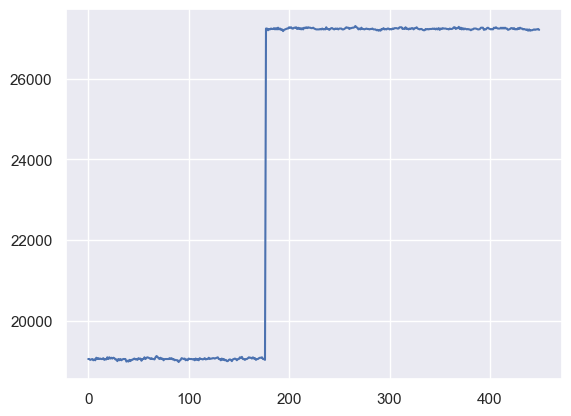

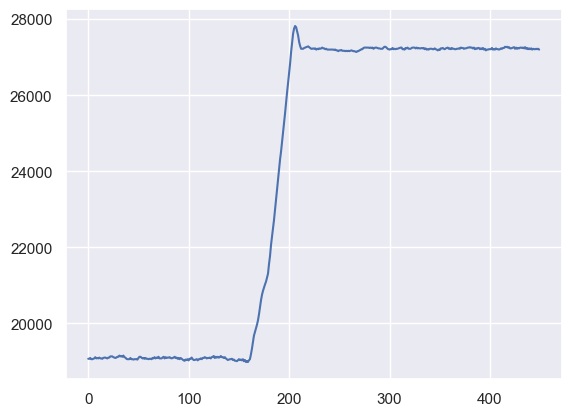

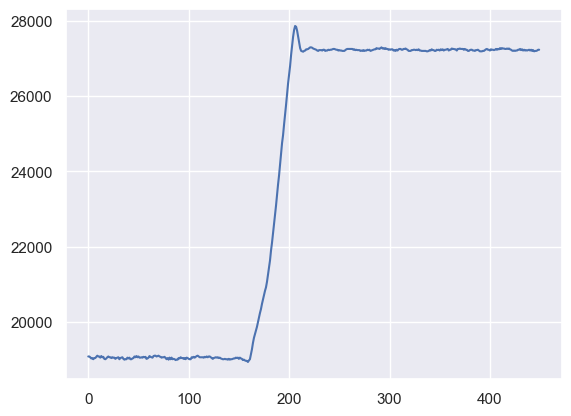

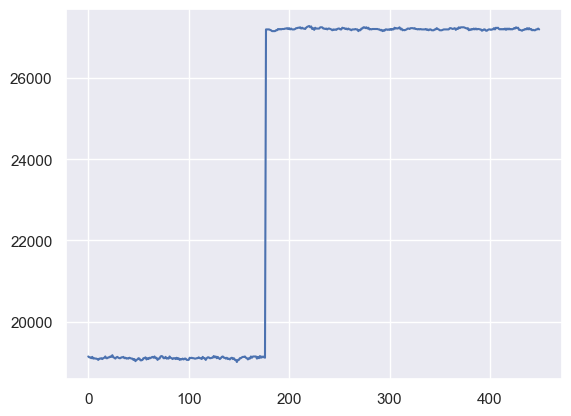

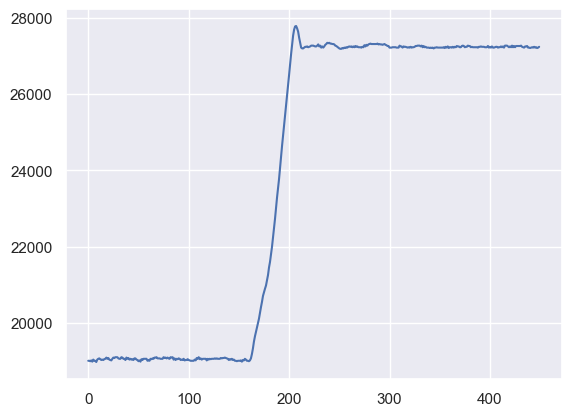

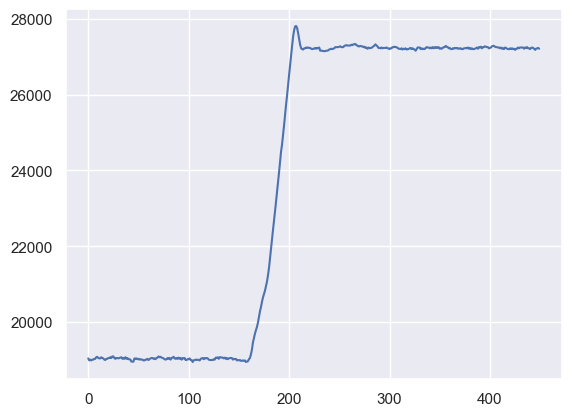

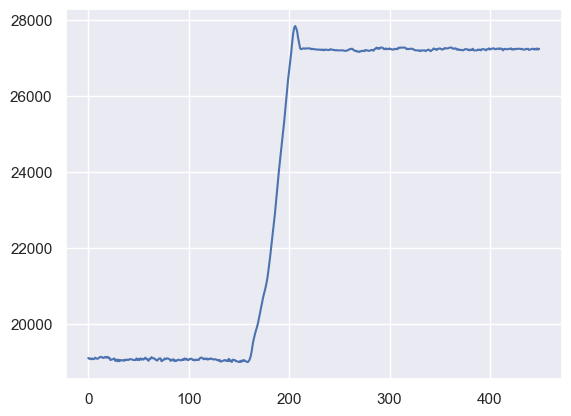

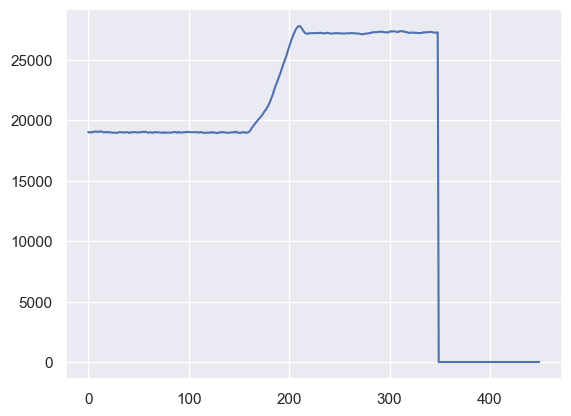

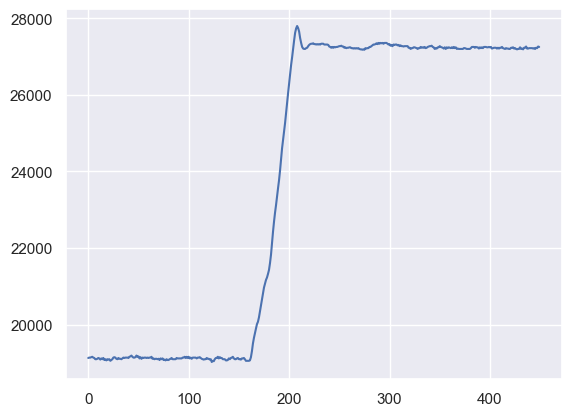

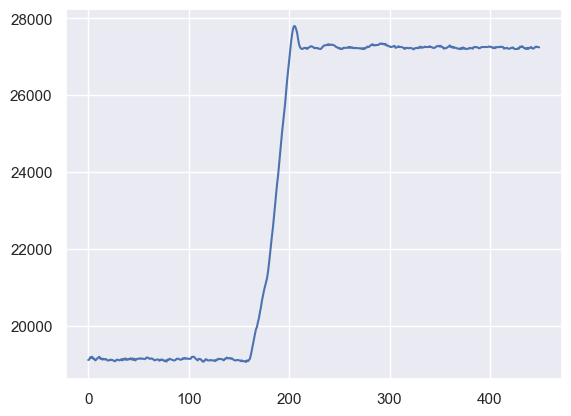

In [44]:
folder = 'C:\\Users\\cnbofan1\\ABB\\Safe Digital in CN - Documents - Documents\
\\06_Test and Analytics\\20220520_ME_XXXX_XXX_Angle_Sensor_Verify_Test_0_5000\\0_Data original\\20220530'
folder_fig = folder
plot_travel_curve(folder, folder_fig, curve_num=10)

## 20220531

2022-05-31-09-50-40_ang_open.csv
2022-05-31-09-50-42_ang_open.csv
2022-05-31-09-50-43_ang_open.csv
2022-05-31-09-50-45_ang_open.csv
2022-05-31-09-50-46_ang_open.csv
2022-05-31-09-50-48_ang_open.csv
2022-05-31-09-50-49_ang_open.csv
2022-05-31-09-50-50_ang_open.csv
2022-05-31-09-50-51_ang_open.csv
2022-05-31-09-50-53_ang_open.csv
2022-05-31-09-50-40_ang_close.csv
2022-05-31-09-50-41_ang_close.csv
2022-05-31-09-50-43_ang_close.csv
2022-05-31-09-50-44_ang_close.csv
2022-05-31-09-50-45_ang_close.csv
2022-05-31-09-50-46_ang_close.csv
2022-05-31-09-50-49_ang_close.csv
2022-05-31-09-50-50_ang_close.csv
2022-05-31-09-50-51_ang_close.csv
2022-05-31-09-50-52_ang_close.csv


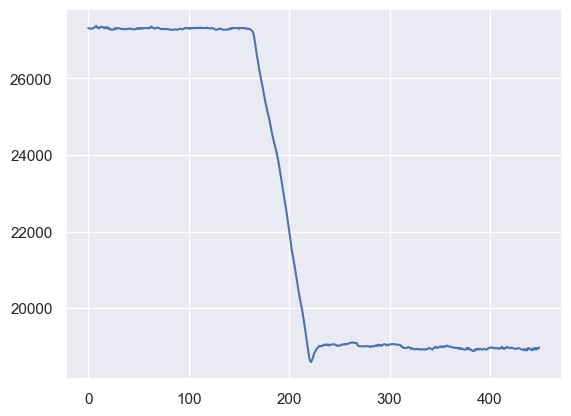

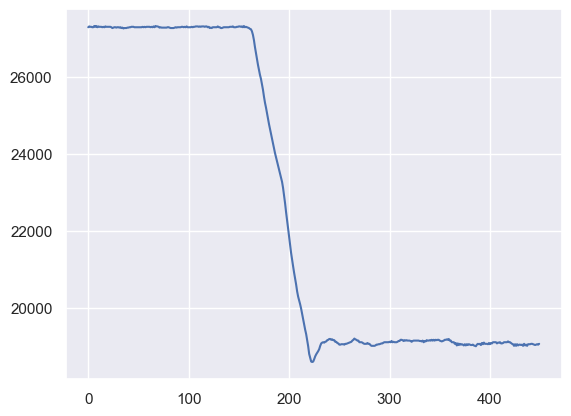

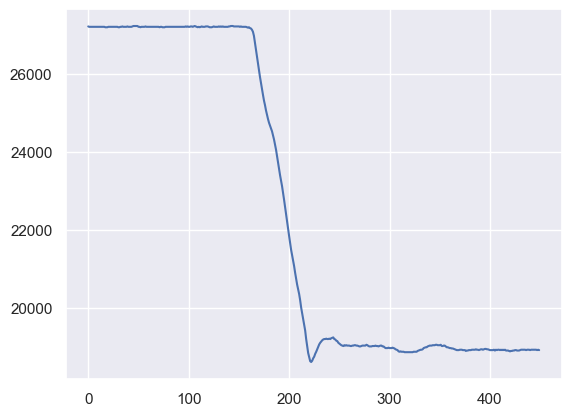

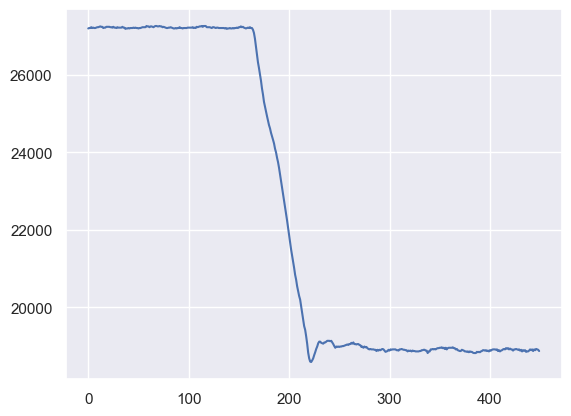

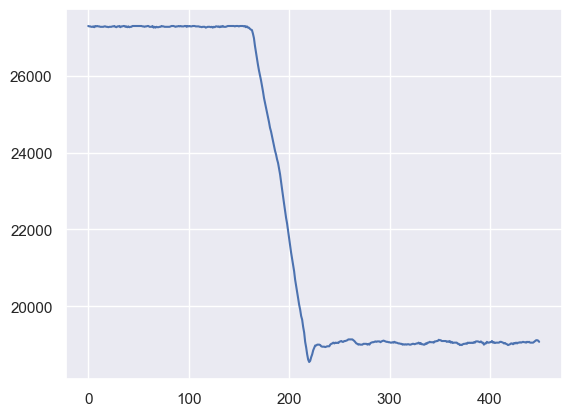

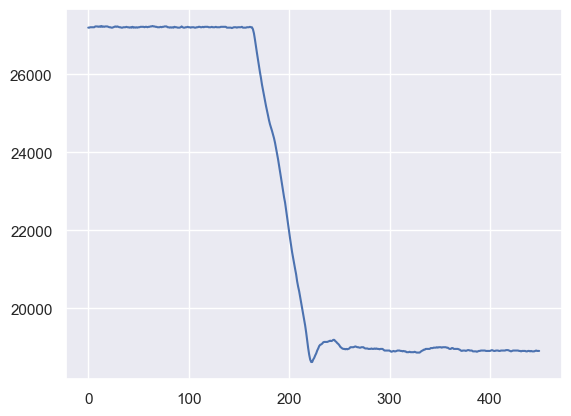

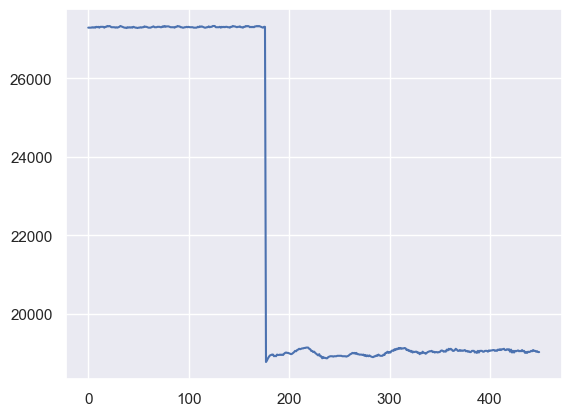

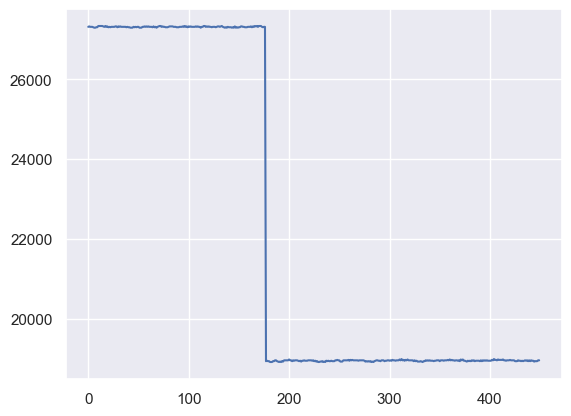

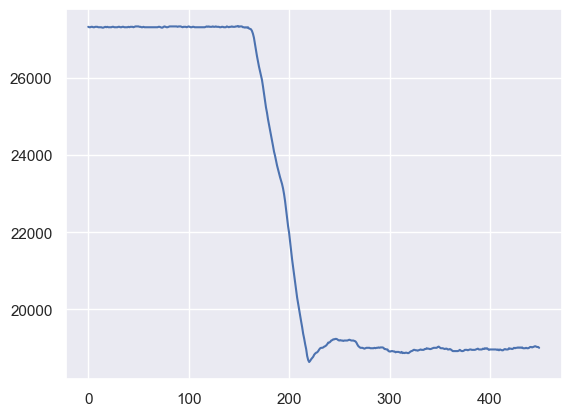

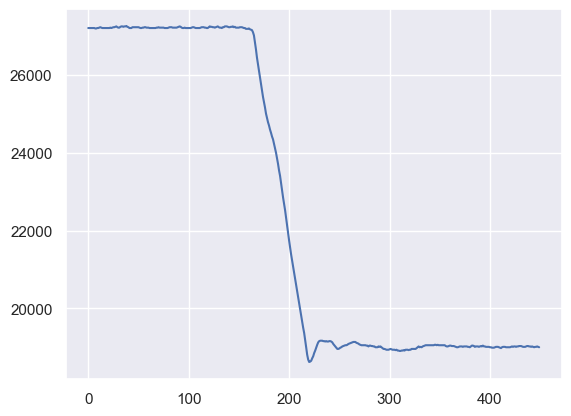

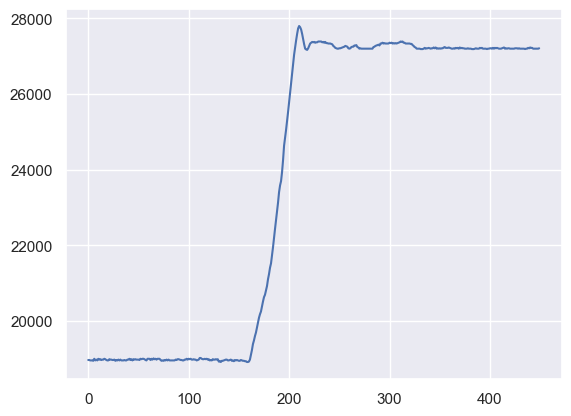

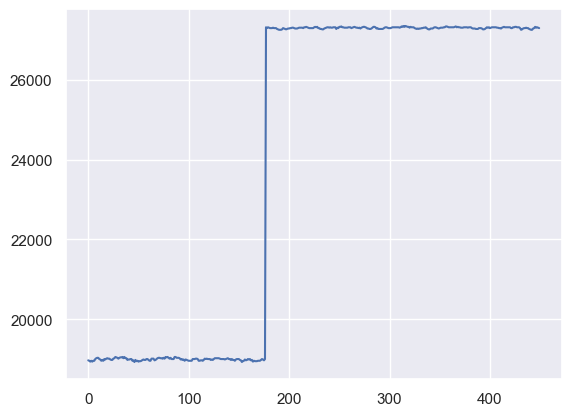

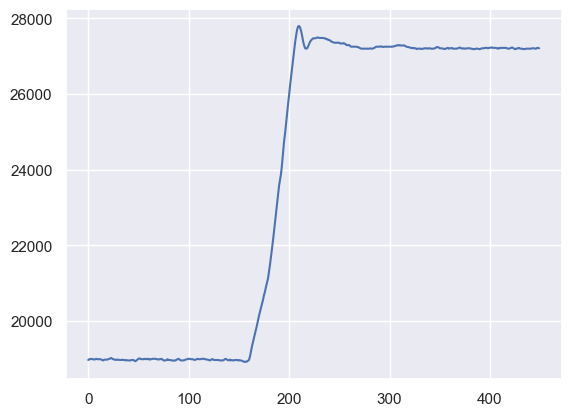

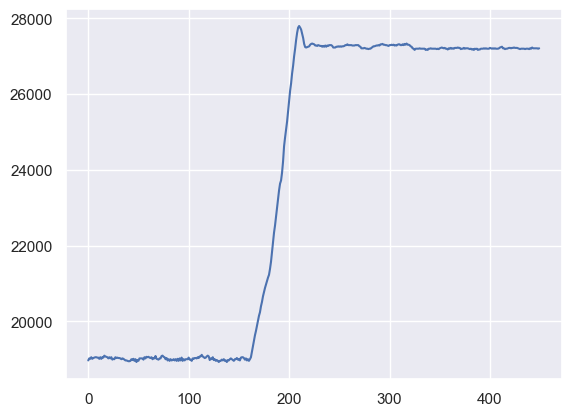

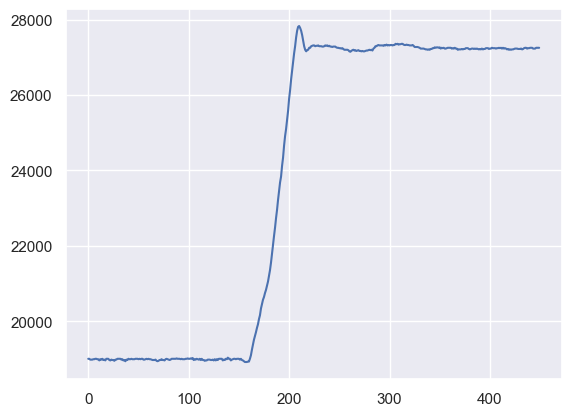

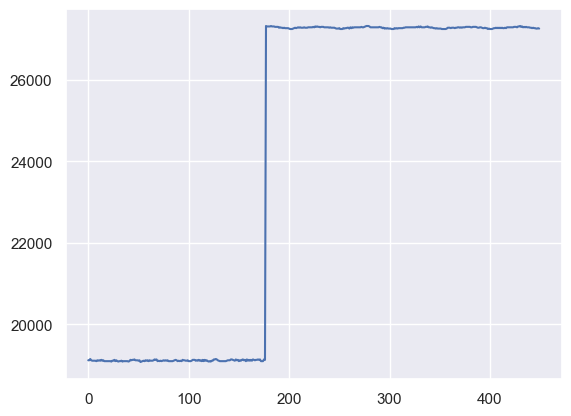

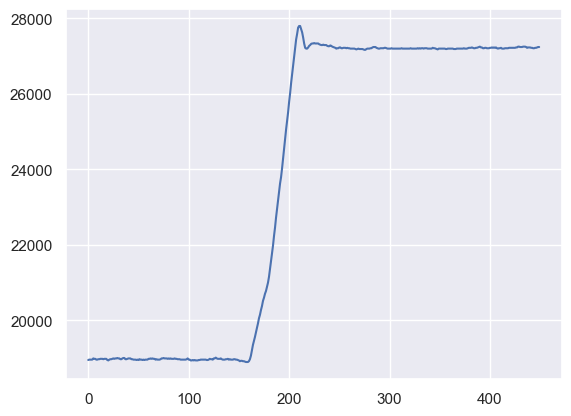

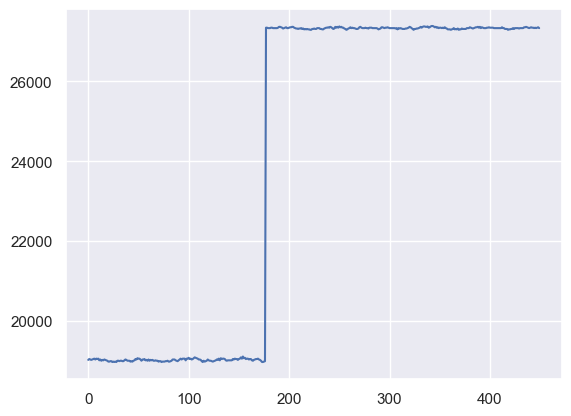

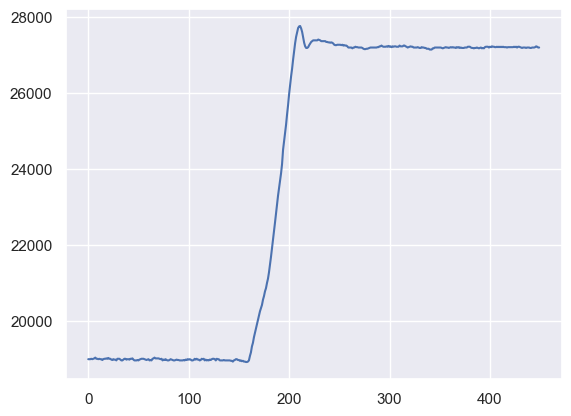

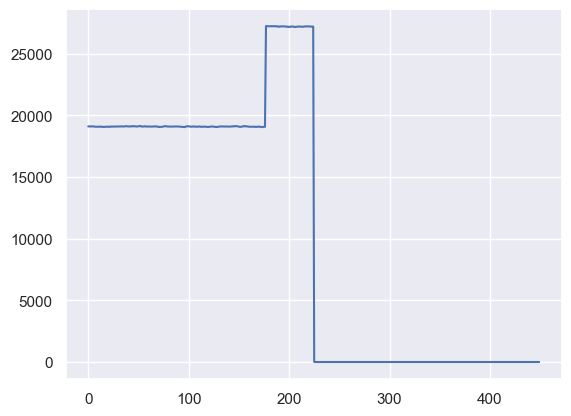

In [50]:
folder = 'C:\\Users\\cnbofan1\\ABB\\Safe Digital in CN - Documents - Documents\
\\06_Test and Analytics\\20220520_ME_XXXX_XXX_Angle_Sensor_Verify_Test_0_5000\\0_Data original\\20220531'
folder_fig = folder
plot_travel_curve(folder, folder_fig, curve_num=10)

## 20220601

2022-06-01-10-07-21_ang_open.csv
2022-06-01-10-07-22_ang_open.csv
2022-06-01-10-07-25_ang_open.csv
2022-06-01-10-07-26_ang_open.csv
2022-06-01-10-07-28_ang_open.csv
2022-06-01-10-07-29_ang_open.csv
2022-06-01-10-07-30_ang_open.csv
2022-06-01-10-07-32_ang_open.csv
2022-06-01-10-07-34_ang_open.csv
2022-06-01-10-07-36_ang_open.csv
2022-06-01-10-07-21_ang_close.csv
2022-06-01-10-07-22_ang_close.csv
2022-06-01-10-07-23_ang_close.csv
2022-06-01-10-07-24_ang_close.csv
2022-06-01-10-07-25_ang_close.csv
2022-06-01-10-07-26_ang_close.csv
2022-06-01-10-07-28_ang_close.csv
2022-06-01-10-07-29_ang_close.csv
2022-06-01-10-07-30_ang_close.csv
2022-06-01-10-07-31_ang_close.csv


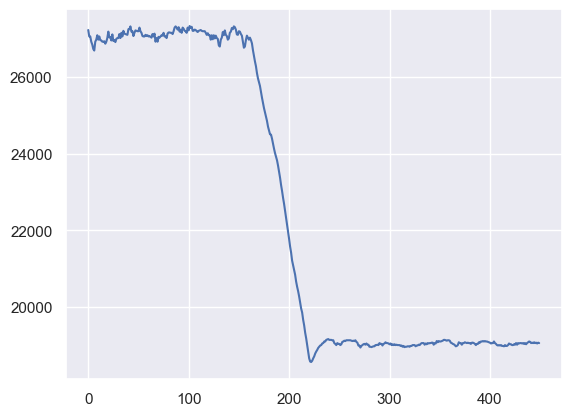

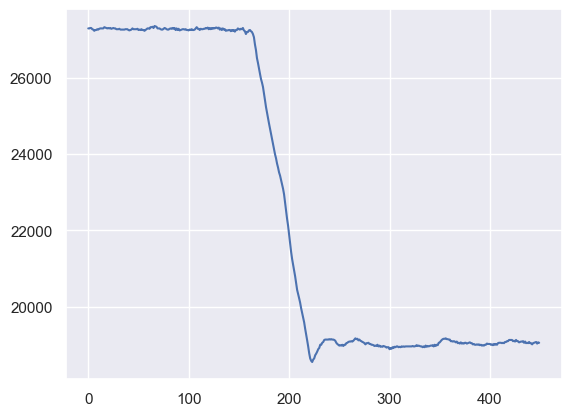

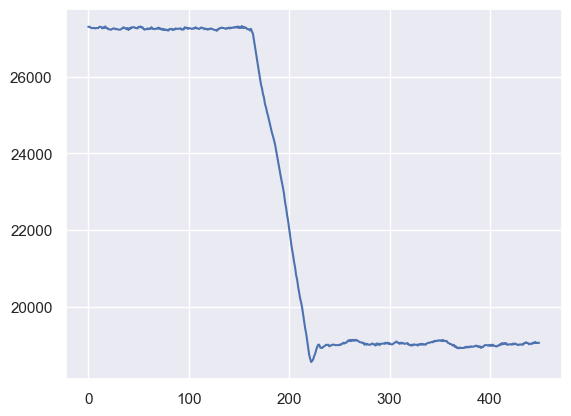

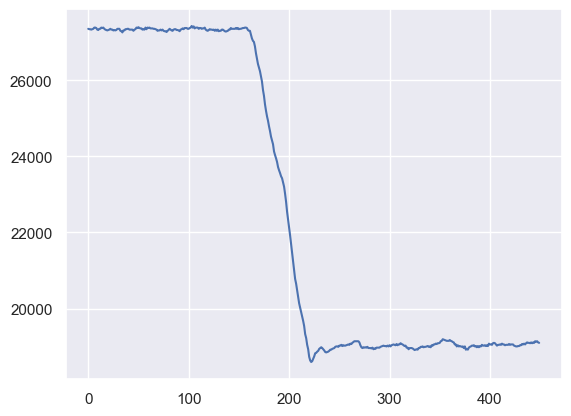

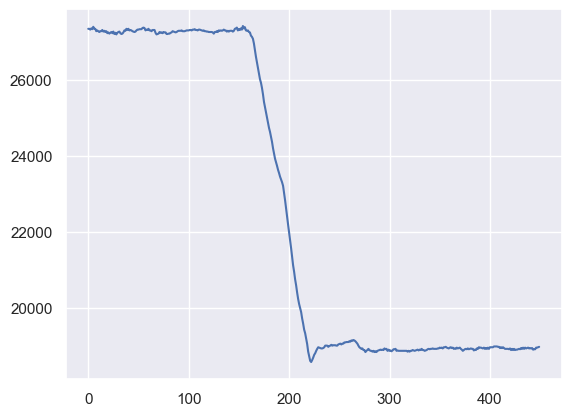

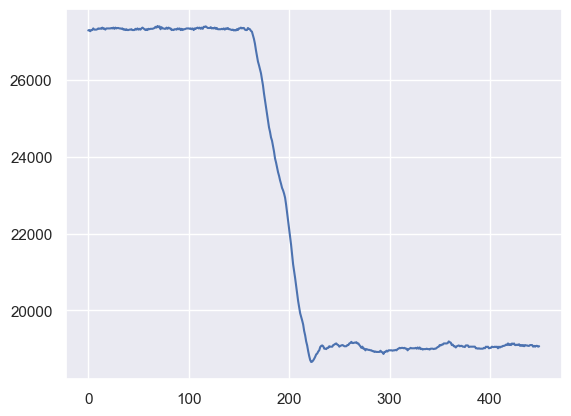

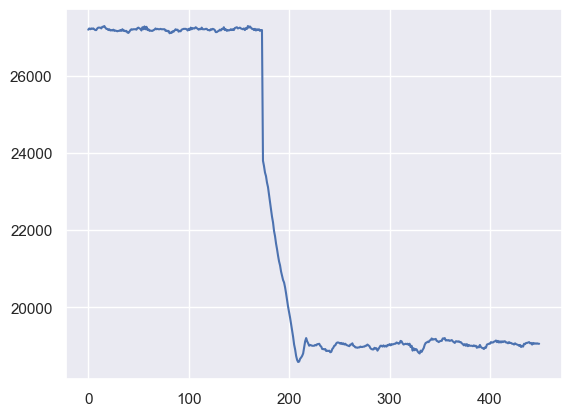

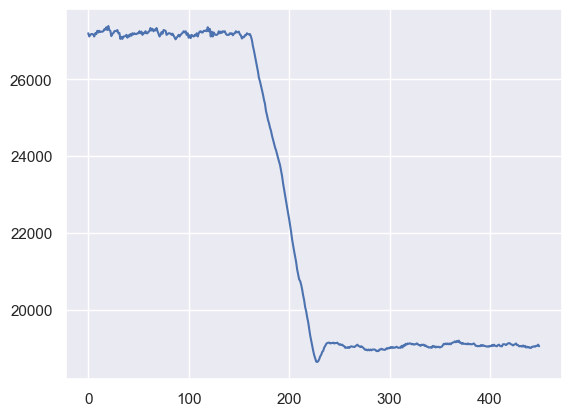

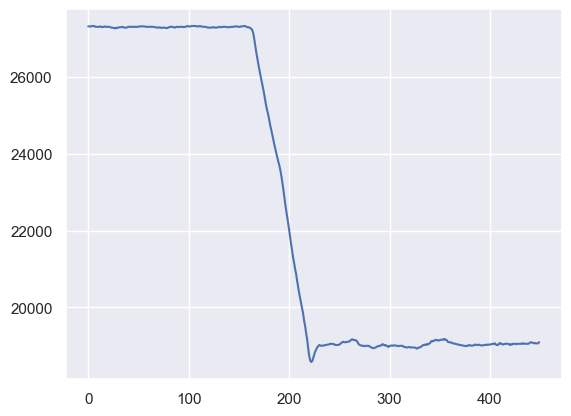

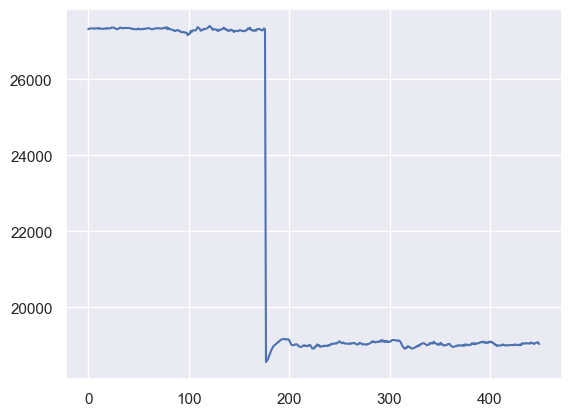

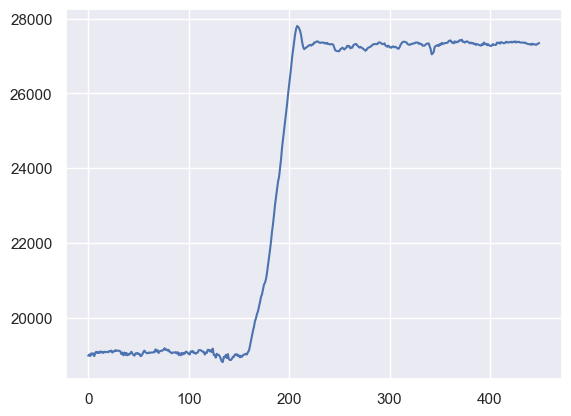

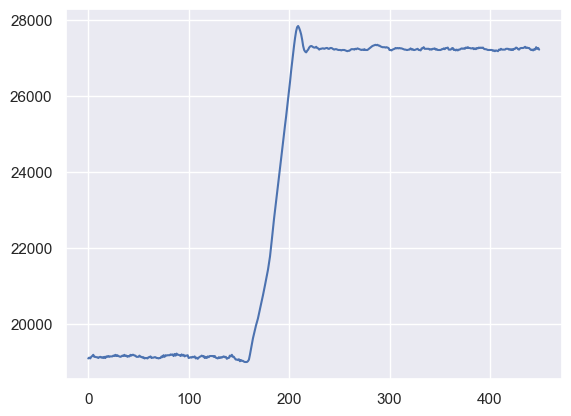

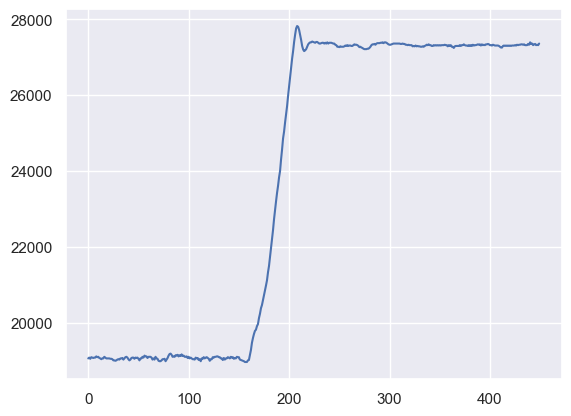

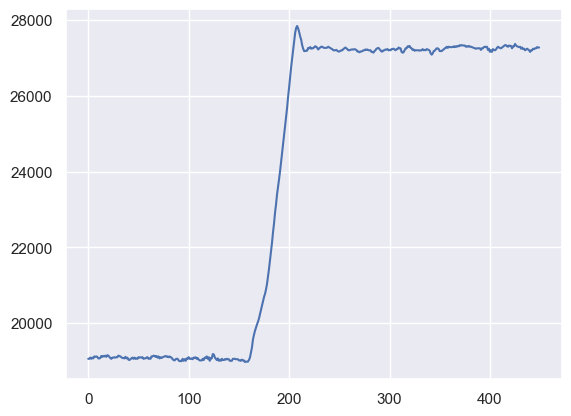

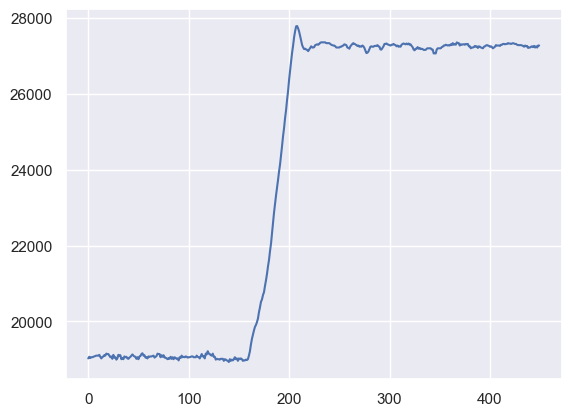

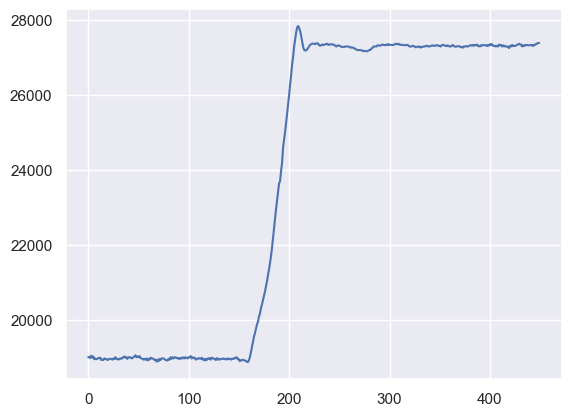

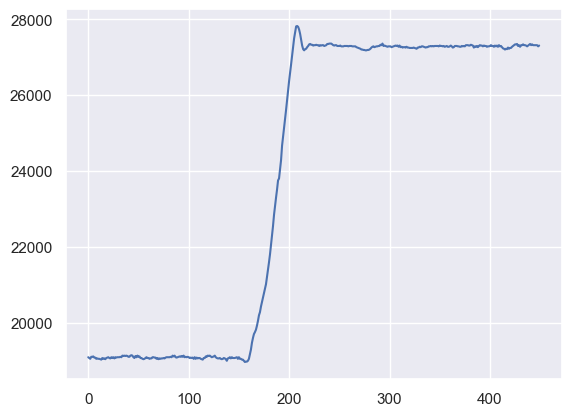

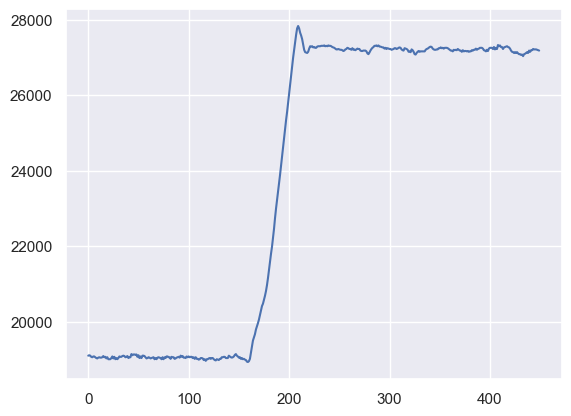

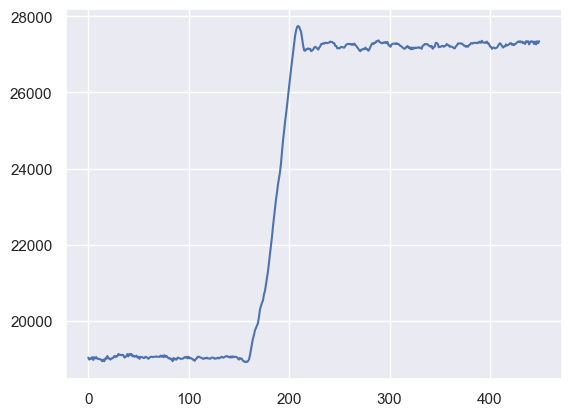

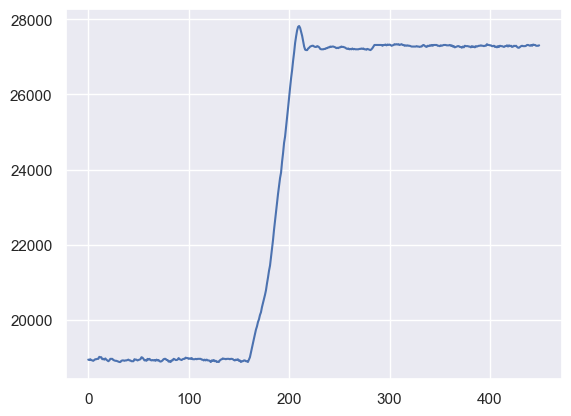

In [46]:
folder = 'C:\\Users\\cnbofan1\\ABB\\Safe Digital in CN - Documents - Documents\
\\06_Test and Analytics\\20220520_ME_XXXX_XXX_Angle_Sensor_Verify_Test_0_5000\\0_Data original\\20220601'
folder_fig = folder
plot_travel_curve(folder, folder_fig, curve_num=10)

## 20220602

2022-06-02-08-37-58_ang_open.csv
2022-06-02-08-38-00_ang_open.csv
2022-06-02-08-38-01_ang_open.csv
2022-06-02-08-38-04_ang_open.csv
2022-06-02-08-38-05_ang_open.csv
2022-06-02-08-38-06_ang_open.csv
2022-06-02-08-38-08_ang_open.csv
2022-06-02-08-38-09_ang_open.csv
2022-06-02-08-38-11_ang_open.csv
2022-06-02-08-38-13_ang_open.csv
2022-06-02-08-37-56_ang_close.csv
2022-06-02-08-37-57_ang_close.csv
2022-06-02-08-38-00_ang_close.csv
2022-06-02-08-38-01_ang_close.csv
2022-06-02-08-38-02_ang_close.csv
2022-06-02-08-38-03_ang_close.csv
2022-06-02-08-38-05_ang_close.csv
2022-06-02-08-38-06_ang_close.csv
2022-06-02-08-38-10_ang_close.csv
2022-06-02-08-38-11_ang_close.csv


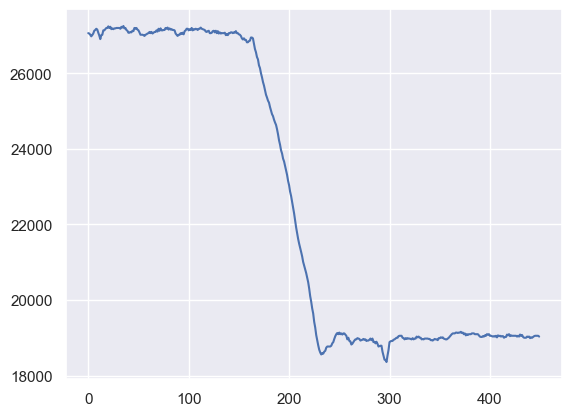

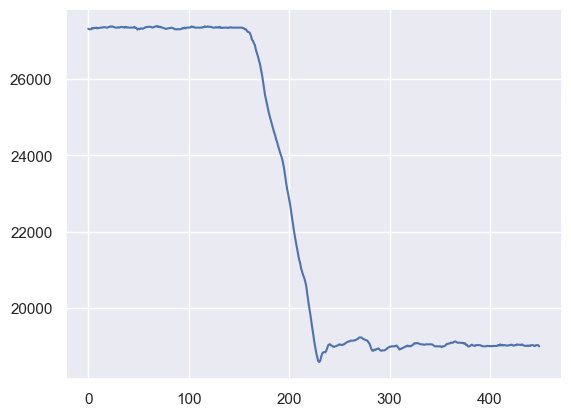

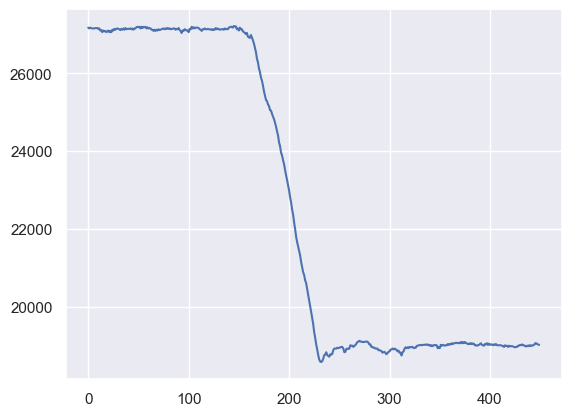

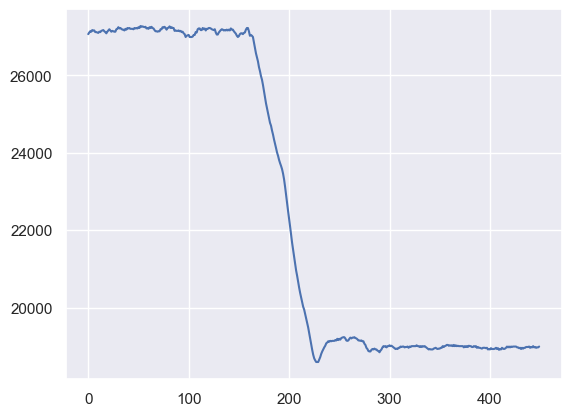

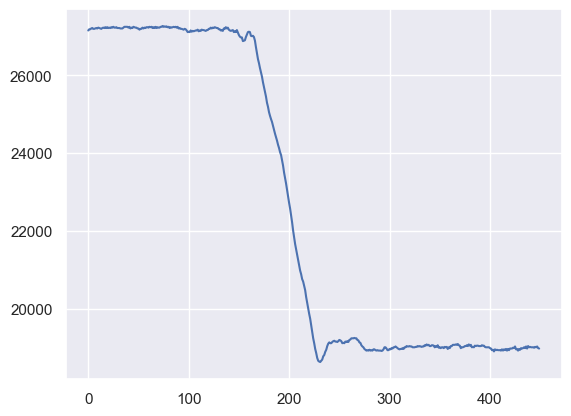

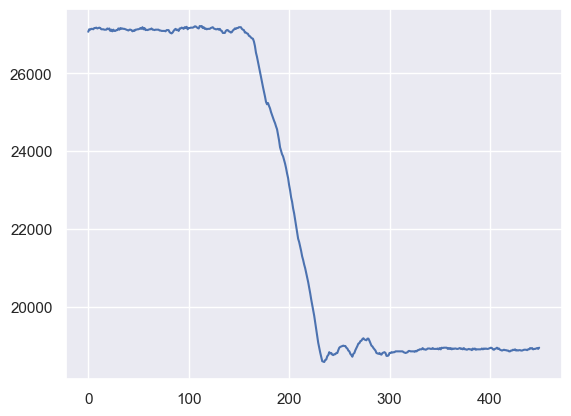

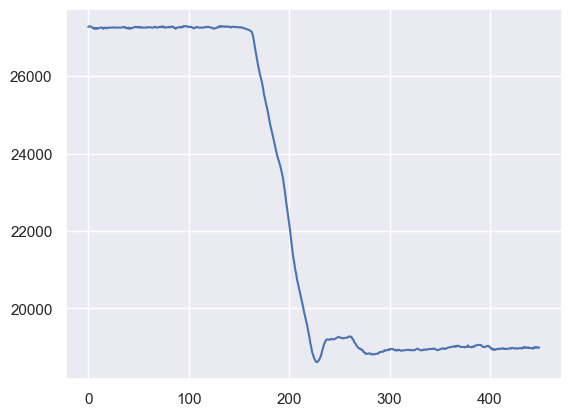

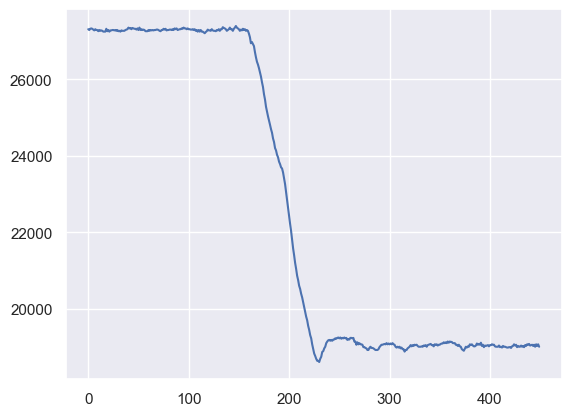

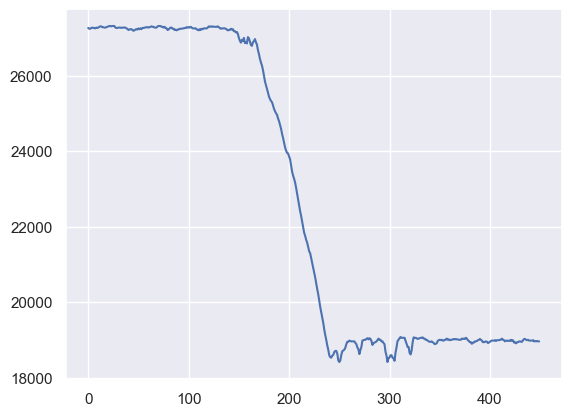

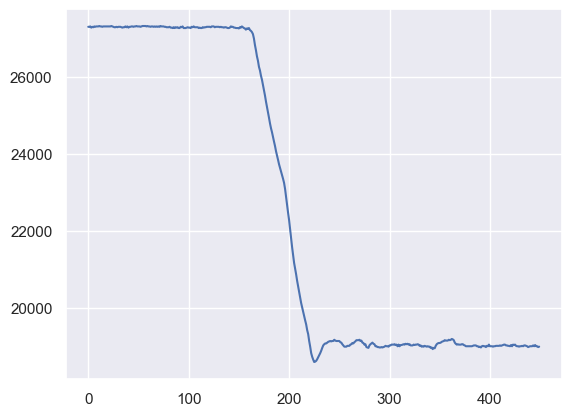

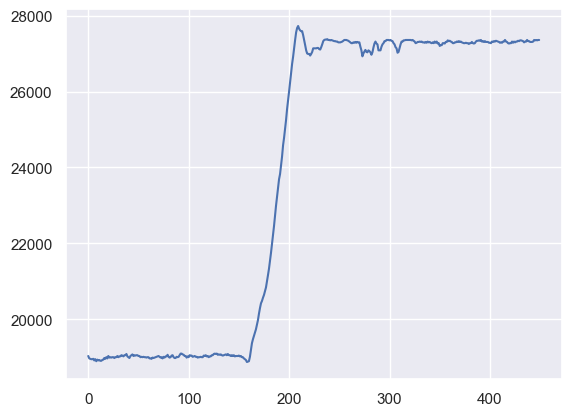

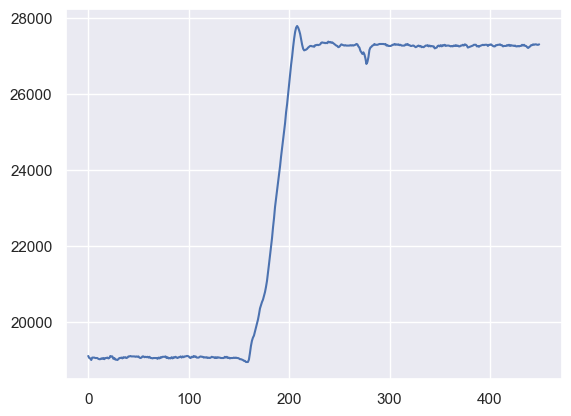

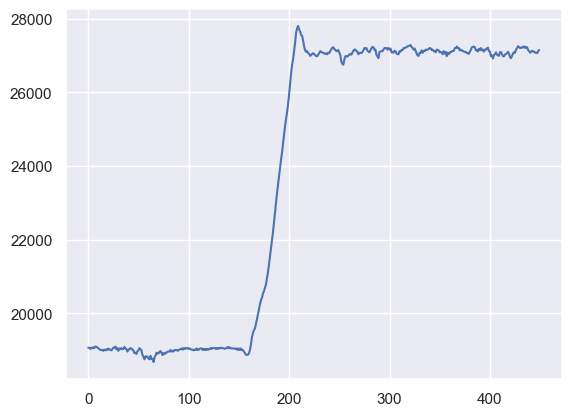

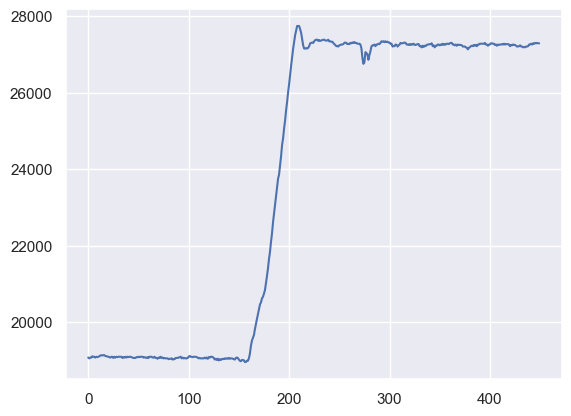

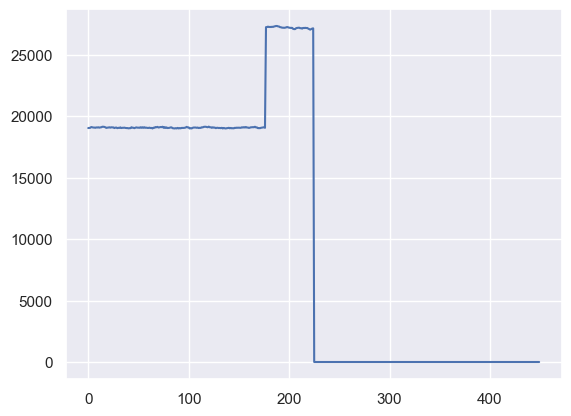

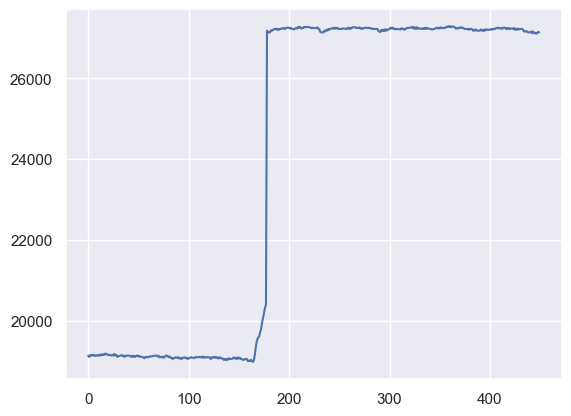

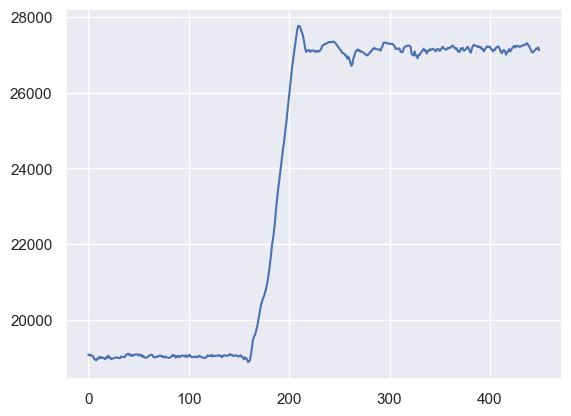

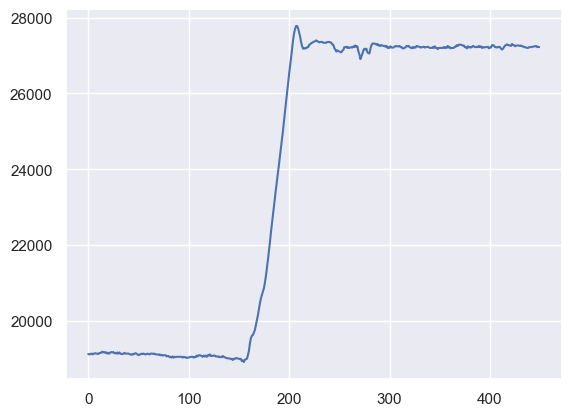

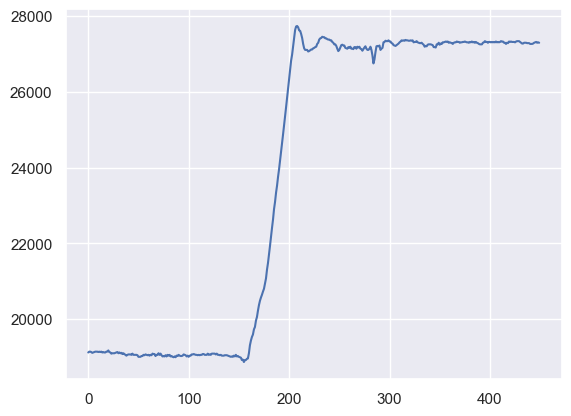

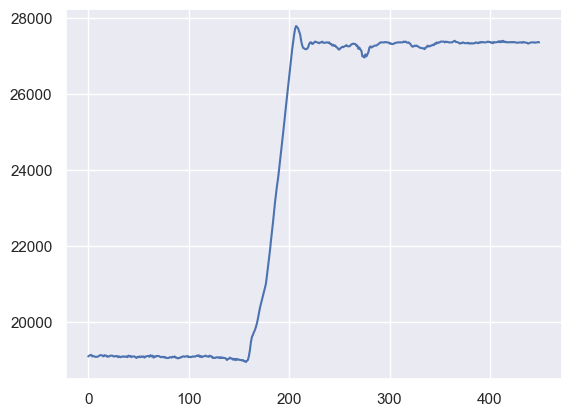

In [47]:
folder = 'C:\\Users\\cnbofan1\\ABB\\Safe Digital in CN - Documents - Documents\
\\06_Test and Analytics\\20220520_ME_XXXX_XXX_Angle_Sensor_Verify_Test_0_5000\\0_Data original\\20220602'
folder_fig = folder
plot_travel_curve(folder, folder_fig, curve_num=10)

## 20220606

2018-01-23-09-25-01_ang_open.csv
2018-01-23-09-25-03_ang_open.csv
2018-01-23-09-25-06_ang_open.csv
2018-01-23-09-25-08_ang_open.csv
2018-01-23-09-25-11_ang_open.csv
2018-01-23-09-25-13_ang_open.csv
2018-01-23-09-25-17_ang_open.csv
2018-01-23-09-25-19_ang_open.csv
2018-01-23-09-25-21_ang_open.csv
2018-01-23-09-25-22_ang_open.csv
2018-01-23-09-25-02_ang_close.csv
2018-01-23-09-25-06_ang_close.csv
2018-01-23-09-25-08_ang_close.csv
2018-01-23-09-25-11_ang_close.csv
2018-01-23-09-25-14_ang_close.csv
2018-01-23-09-25-17_ang_close.csv
2018-01-23-09-25-21_ang_close.csv
2018-01-23-09-25-24_ang_close.csv
2018-01-23-09-25-26_ang_close.csv
2018-01-23-09-25-29_ang_close.csv


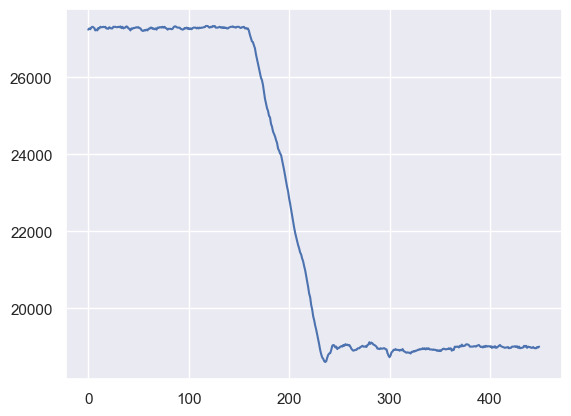

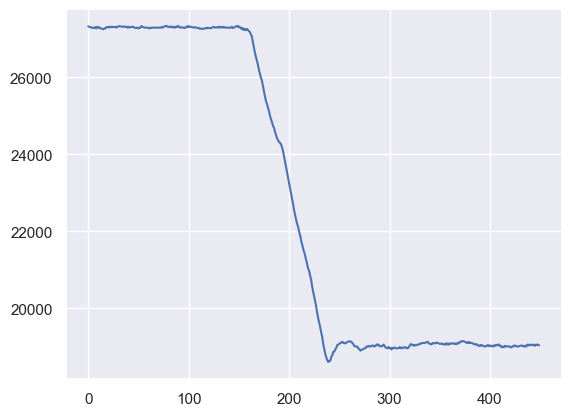

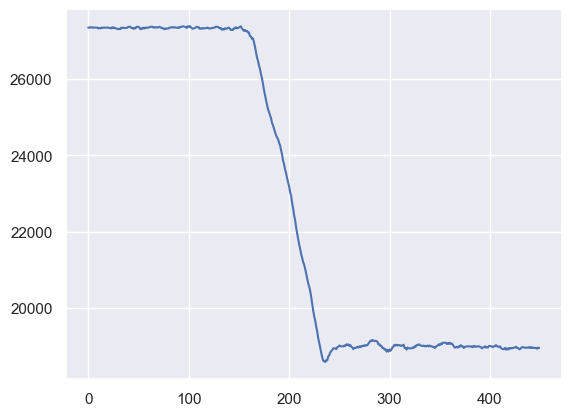

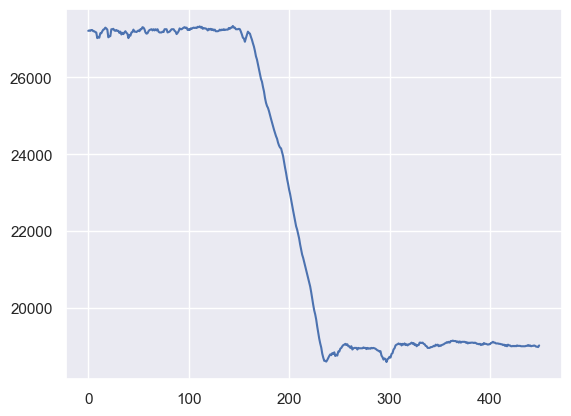

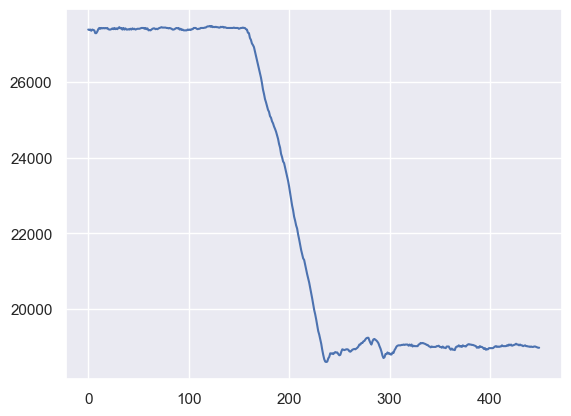

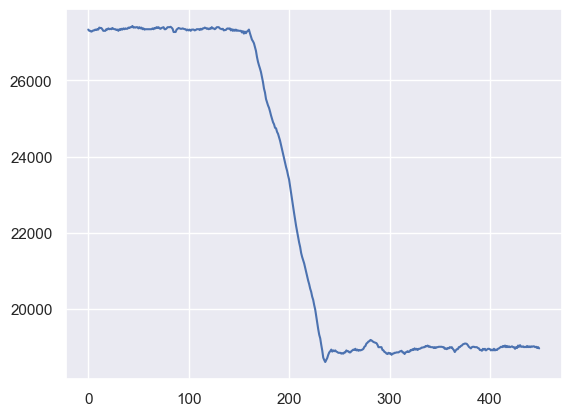

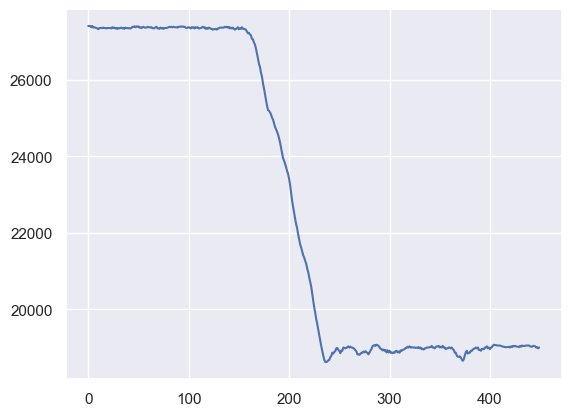

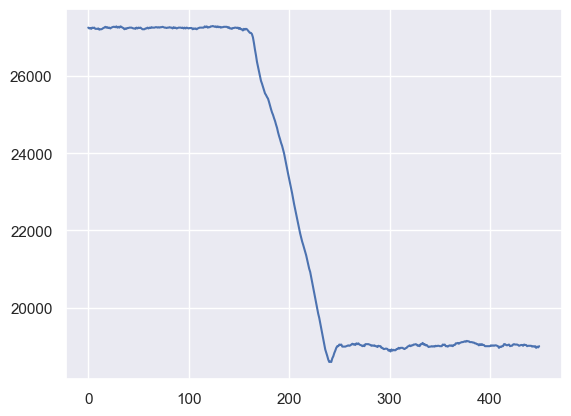

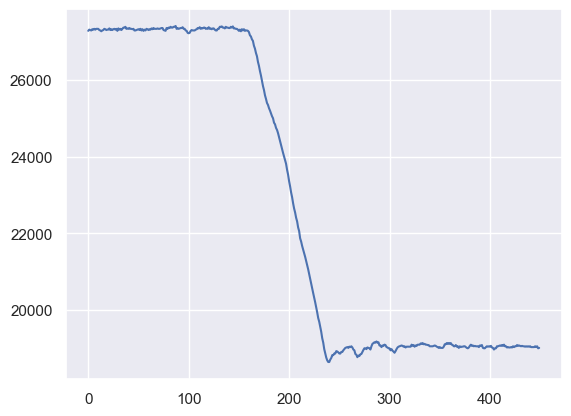

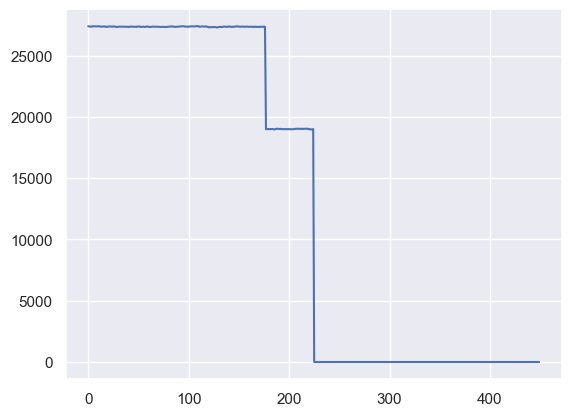

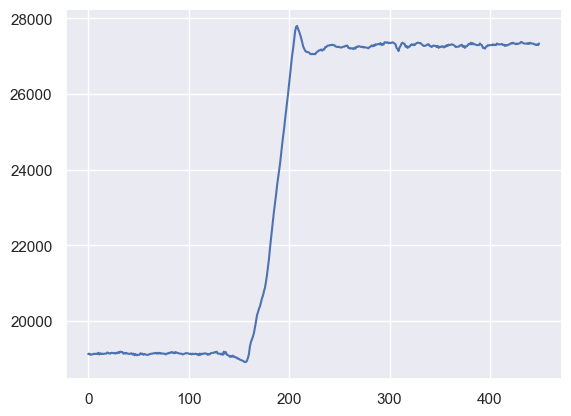

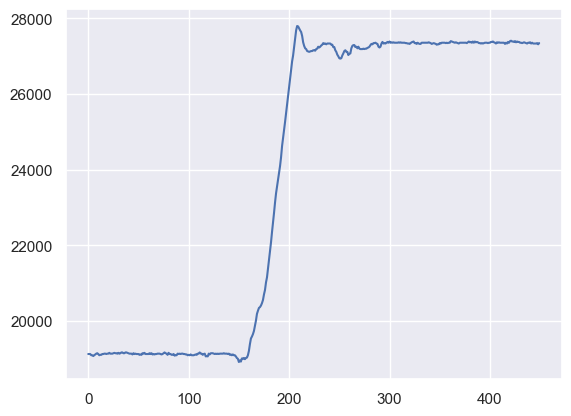

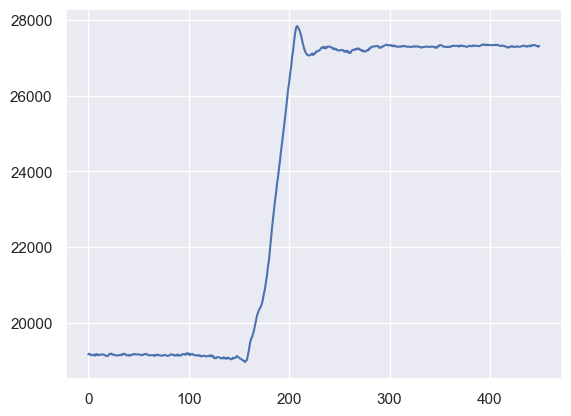

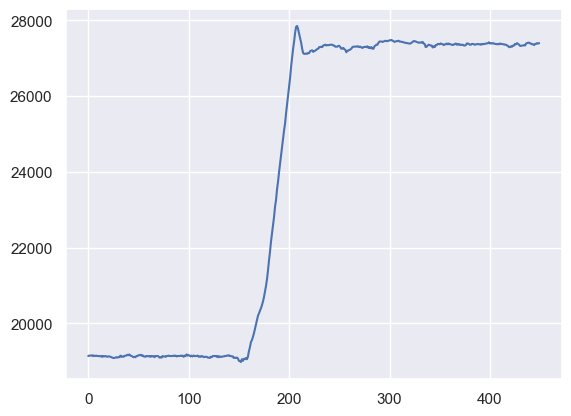

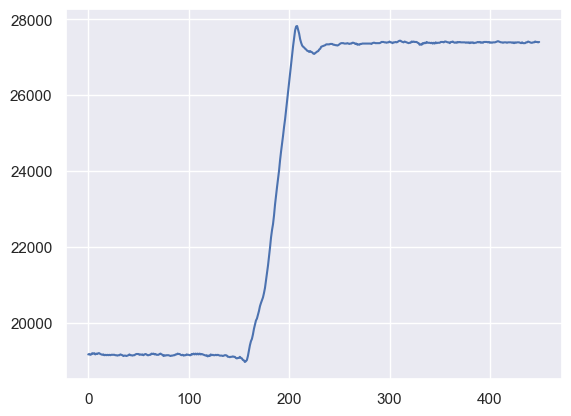

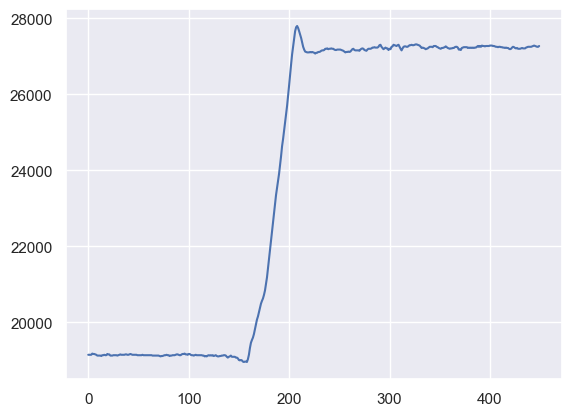

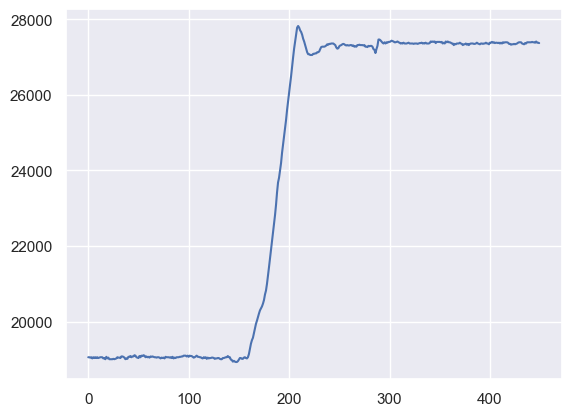

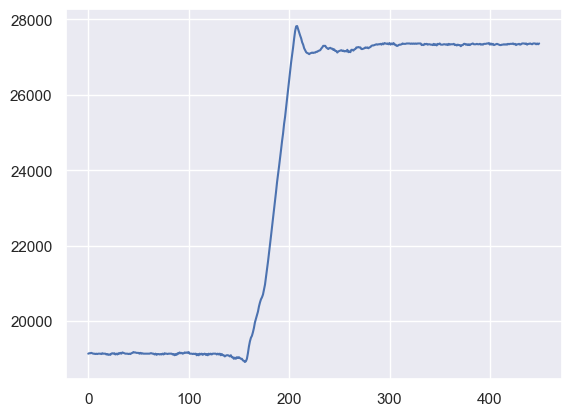

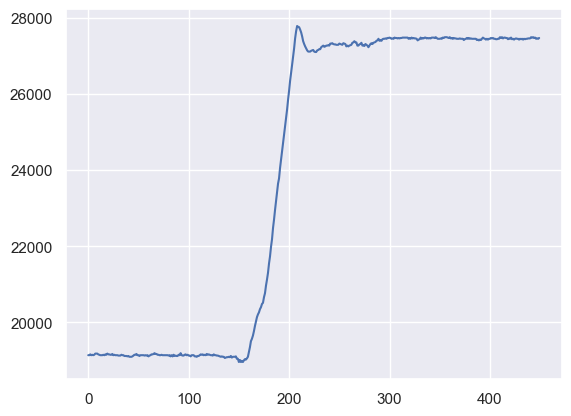

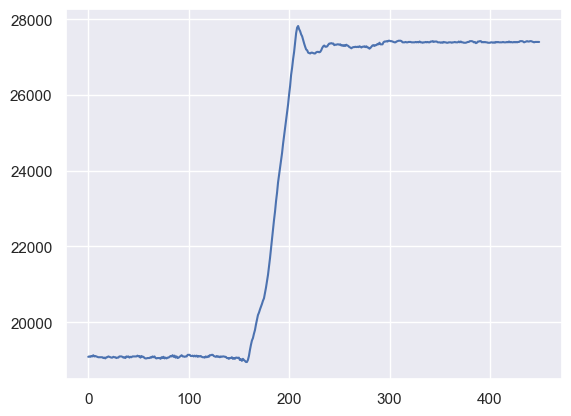

In [48]:
folder = 'C:\\Users\\cnbofan1\\ABB\\Safe Digital in CN - Documents - Documents\
\\06_Test and Analytics\\20220520_ME_XXXX_XXX_Angle_Sensor_Verify_Test_0_5000\\0_Data original\\20220606'
folder_fig = folder
plot_travel_curve(folder, folder_fig, curve_num=10)

## 20220608

2022-06-08-11-03-07_ang_open.csv
2022-06-08-11-09-29_ang_open.csv
2022-06-08-11-10-13_ang_open.csv
2022-06-08-11-11-19_ang_open.csv
2022-06-08-11-12-06_ang_open.csv
2022-06-08-11-08-59_ang_close.csv
2022-06-08-11-09-49_ang_close.csv
2022-06-08-11-10-48_ang_close.csv
2022-06-08-11-11-40_ang_close.csv
2022-06-08-11-12-26_ang_close.csv


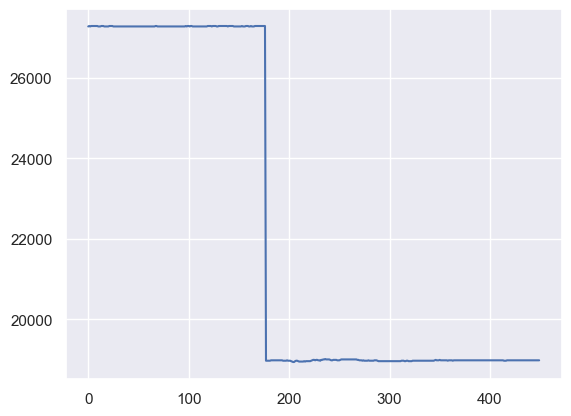

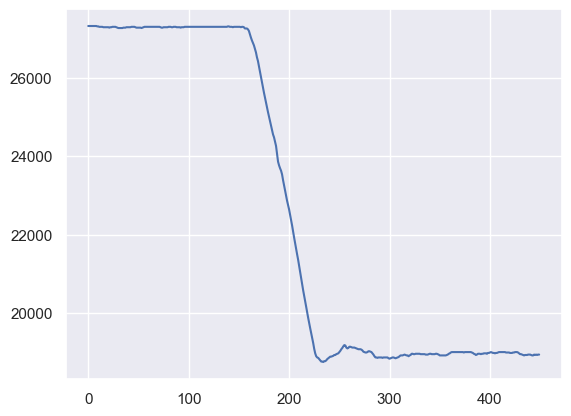

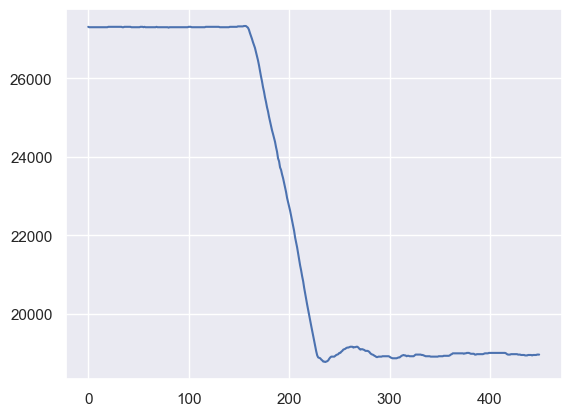

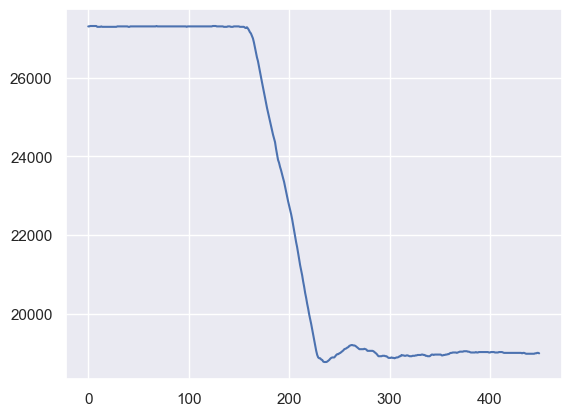

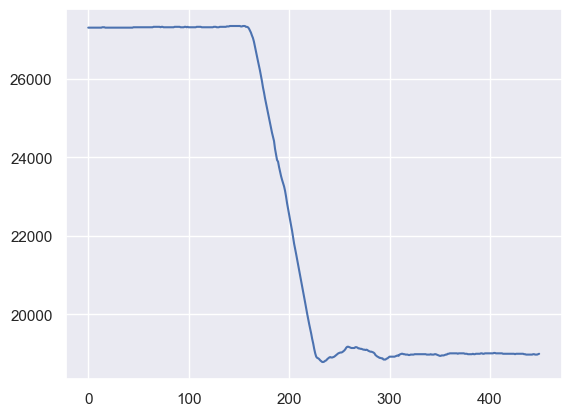

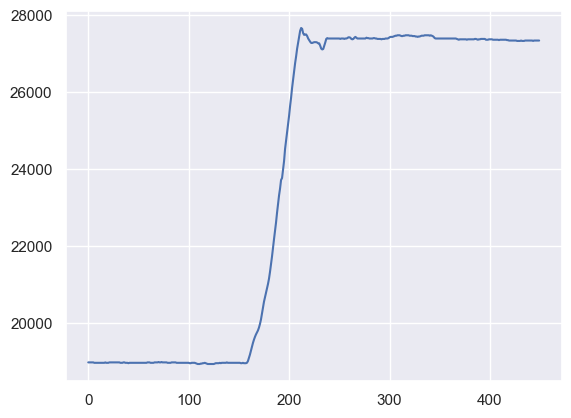

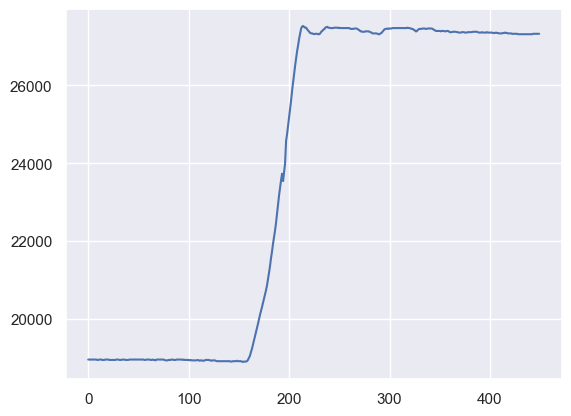

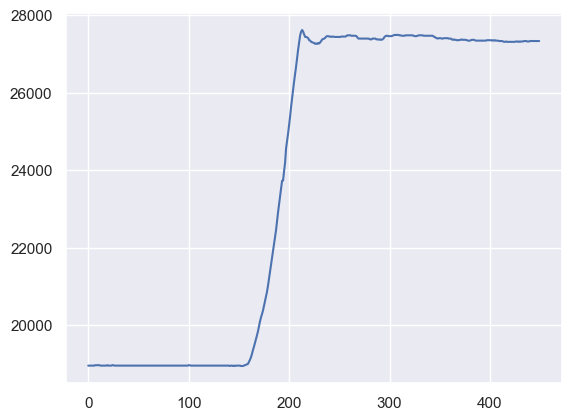

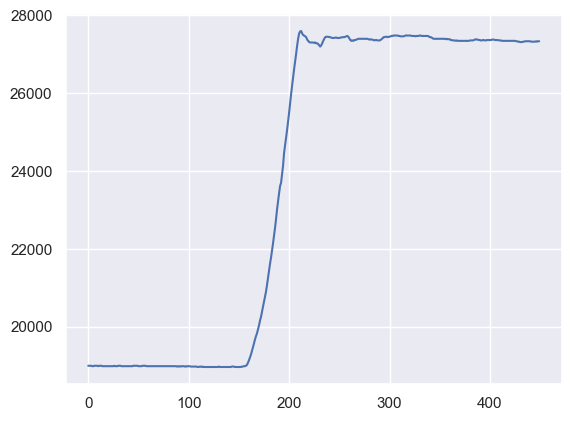

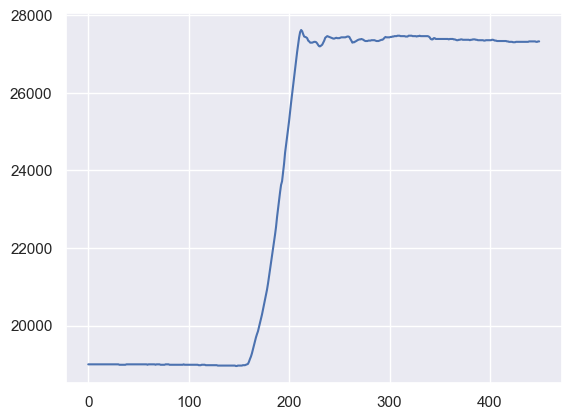

In [49]:
folder = 'C:\\Users\\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\\06_Test and Analytics\
\\20220520_ME_XXXX_XXX_Angle_Sensor_Verify_Test_0_5000\\0_Data original\\20220608_IMM_VS_SA100\\IMM'
folder_fig = folder
plot_travel_curve(folder, folder_fig, curve_num=10)

## 20220614

2022-06-14-10-20-03_ang_open.csv
2022-06-14-10-20-36_ang_open.csv
2022-06-14-10-19-42_ang_close.csv
2022-06-14-10-20-19_ang_close.csv


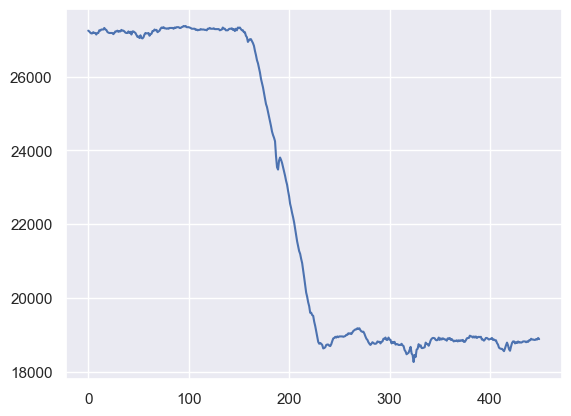

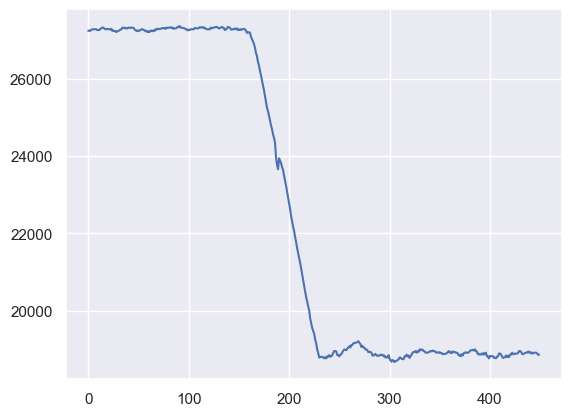

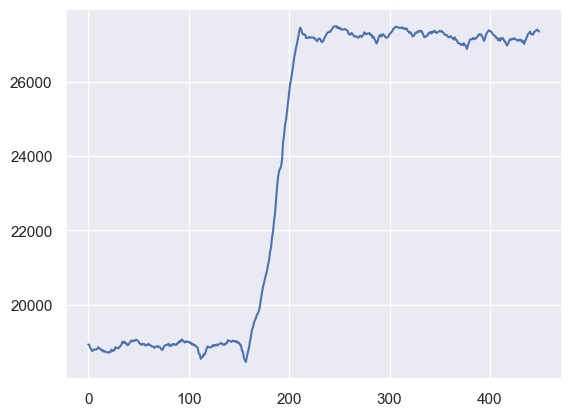

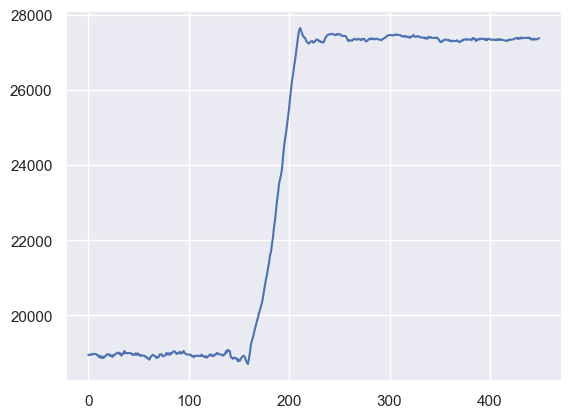

In [32]:
folder = 'C:\\Users\\cnbofan1\\ABB\\Safe Digital in CN - Documents - Documents\
\\06_Test and Analytics\\20220520_ME_XXXX_XXX_Angle_Sensor_Verify_Test_0_5000\\0_Data original\\2022_06_14_SA100_VS_IMM'
folder_fig = folder
plot_travel_curve(folder, folder_fig)